# Online Shoppers Purchasing Intention

#### **Name**        : Listy Stephen

#### **Organization**: Entri Elevate

#### **Date          :** 01-JAN-2025

### 1. **Overview of Problem Statement:**

The goal of this project is to develop a classification model that predicts whether an e-commerce customer will generate revenue, essentially determining if a customer will make a purchase after browsing the website. The project will focus on enhancing model performance through various improvements. Additionally, it will incorporate a pipeline to seamlessly integrate preprocessing and modeling steps.

### 2. **Objective:**

Predict online shoppers purchase intension using ML algoriths.Thus we can ideantify whether the customer will bring revenue to the business or not.

### 3. **Data Description:**

Source : https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset

Out of the 12,330 sessions in the dataset, 84.5% (10,422) were negative class samples that did not end with shopping, and the rest (1908) were positive class samples ending with shopping.

Dataset Characteristics : Multivariate

Subject Area : Business

Feature Type : Integer, Real

Instances : 12330

Features : 17

#### Numerical features used 

| Feature name                | Feature description                                                                                         | Min. value | Max. value | SD      |
|-----------------------------|-------------------------------------------------------------------------------------------------------------|------------|------------|---------|
| Administrative              | Number of pages visited by the visitor about account management                                              | 0          | 27         | 3.32    |
| Administrative duration     | Total amount of time (in seconds) spent by the visitor on account management related pages                   | 0          | 3398       | 176.70  |
| Informational               | Number of pages visited by the visitor about website, communication, and address information of the shopping site | 0          | 24         | 1.26    |
| Informational duration      | Total amount of time (in seconds) spent by the visitor on informational pages                               | 0          | 2549       | 140.64  |
| Product related             | Number of pages visited by visitor about product-related pages                                              | 0          | 705        | 44.45   |
| Product related duration    | Total amount of time (in seconds) spent by the visitor on product-related pages                             | 0          | 63973      | 1912.25 |
| Bounce rate                 | Average bounce rate value of the pages visited by the visitor                                               | 0          | 0.2        | 0.04    |
| Exit rate                   | Average exit rate value of the pages visited by the visitor                                                 | 0          | 0.2        | 0.05    |
| Page value                  | Average page value of the pages visited by the visitor                                                      | 0          | 361        | 18.55   |
| Special day                 | Closeness of the site visiting time to a special day                                                        | 0          | 1.0        | 0.19    |


#### Categorical features used

| Feature name    | Feature description                                                                                      | Number of categorical values |
|-----------------|----------------------------------------------------------------------------------------------------------|------------------------------|
| OperatingSystems | Operating system of the visitor                                                                          | 8                            |
| Browser         | Browser of the visitor                                                                                    | 13                           |
| Region          | Geographic region from which the session has been started by the visitor                                 | 9                            |
| TrafficType     | Traffic source by which the visitor has arrived at the website (e.g., banner, SMS, direct)               | 20                           |
| VisitorType     | Visitor type as ‘‘New Visitor,’’ ‘‘Returning Visitor,’’ and ‘‘Other’’                                      | 3                            |
| Weekend         | Boolean value indicating whether the date of the visit is a weekend                                      | 2                            |
| Month           | Month value of the visit date                                                                             | 12                           |
| Revenue         | Class label indicating whether the visit has been finalized with a transaction                           | 2                            |


### 4. **Data Collection:**

#### 4.1 Import Library

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

In [347]:
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
import joblib


In [19]:
import warnings
warnings.filterwarnings('ignore')

#### **4.2 Load Dataset**

In [21]:
df=pd.read_csv("online_shoppers_intention.csv")

#### **4.3 Explore Dataset**

In [23]:
df.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

In [24]:
df.shape

(12330, 18)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [26]:
#Checking datatypes distribution

In [27]:
#number

df.select_dtypes('number').describe().T

count         mean          std  min         25%  \
Administrative           12330.0     2.315166     3.321784  0.0    0.000000   
Administrative_Duration  12330.0    80.818611   176.779107  0.0    0.000000   
Informational            12330.0     0.503569     1.270156  0.0    0.000000   
Informational_Duration   12330.0    34.472398   140.749294  0.0    0.000000   
ProductRelated           12330.0    31.731468    44.475503  0.0    7.000000   
ProductRelated_Duration  12330.0  1194.746220  1913.669288  0.0  184.137500   
BounceRates              12330.0     0.022191     0.048488  0.0    0.000000   
ExitRates                12330.0     0.043073     0.048597  0.0    0.014286   
PageValues               12330.0     5.889258    18.568437  0.0    0.000000   
SpecialDay               12330.0     0.061427     0.198917  0.0    0.000000   
OperatingSystems         12330.0     2.124006     0.911325  1.0    2.000000   
Browser                  12330.0     2.357097     1.717277  1.0    2.000000   
Region                   12330.0     3.147364     2.401591  1.0    1.000000   
TrafficType              12330.0     4.069586     4.025169  1.0    2.000000   

                                50%          75%           max  
Administrative             1.000000     4.000000     27.000000  
Administrative_Duration    7.500000    93.256250   3398.750000  
Informational              0.000000     0.000000     24.000000  
Informational_Duration     0.000000     0.000000   2549.375000  
ProductRelated            18.000000    38.000000    705.000000  
ProductRelated_Duration  598.936905  1464.157214  63973.522230  
BounceRates                0.003112     0.016813      0.200000  
ExitRates                  0.025156     0.050000      0.200000  
PageValues                 0.000000     0.000000    361.763742  
SpecialDay                 0.000000     0.000000      1.000000  
OperatingSystems           2.000000     3.000000      8.000000  
Browser                    2.000000     2.000000     13.000000  
Region                     3.000000     4.000000      9.000000  
TrafficType                2.000000     4.000000     20.000000

In [28]:
#object
df.select_dtypes(object).describe().T

count unique                top   freq
Month        12330     10                May   3364
VisitorType  12330      3  Returning_Visitor  10551

In [29]:
#boolean
df.select_dtypes(bool).describe().T

count unique    top   freq
Weekend  12330      2  False   9462
Revenue  12330      2  False  10422

### **5. Data Preprocessing - Data Cleaning**

#### **5.1 Checking Missing Values**

In [32]:

df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

#### **5.2 Handle Duplicate values**

In [34]:

df.duplicated().any()

True

In [35]:
df.duplicated().sum()

125

In [36]:
#Removing duplicates
df.drop_duplicates(keep='first',inplace=True)

In [37]:
#checking again after dropping duplicates
df.duplicated().any()

False

In [38]:
df.duplicated().sum()

0

#### **5.3 Outlier Detection and Handling**

##### **5.3.1 Box Plot**

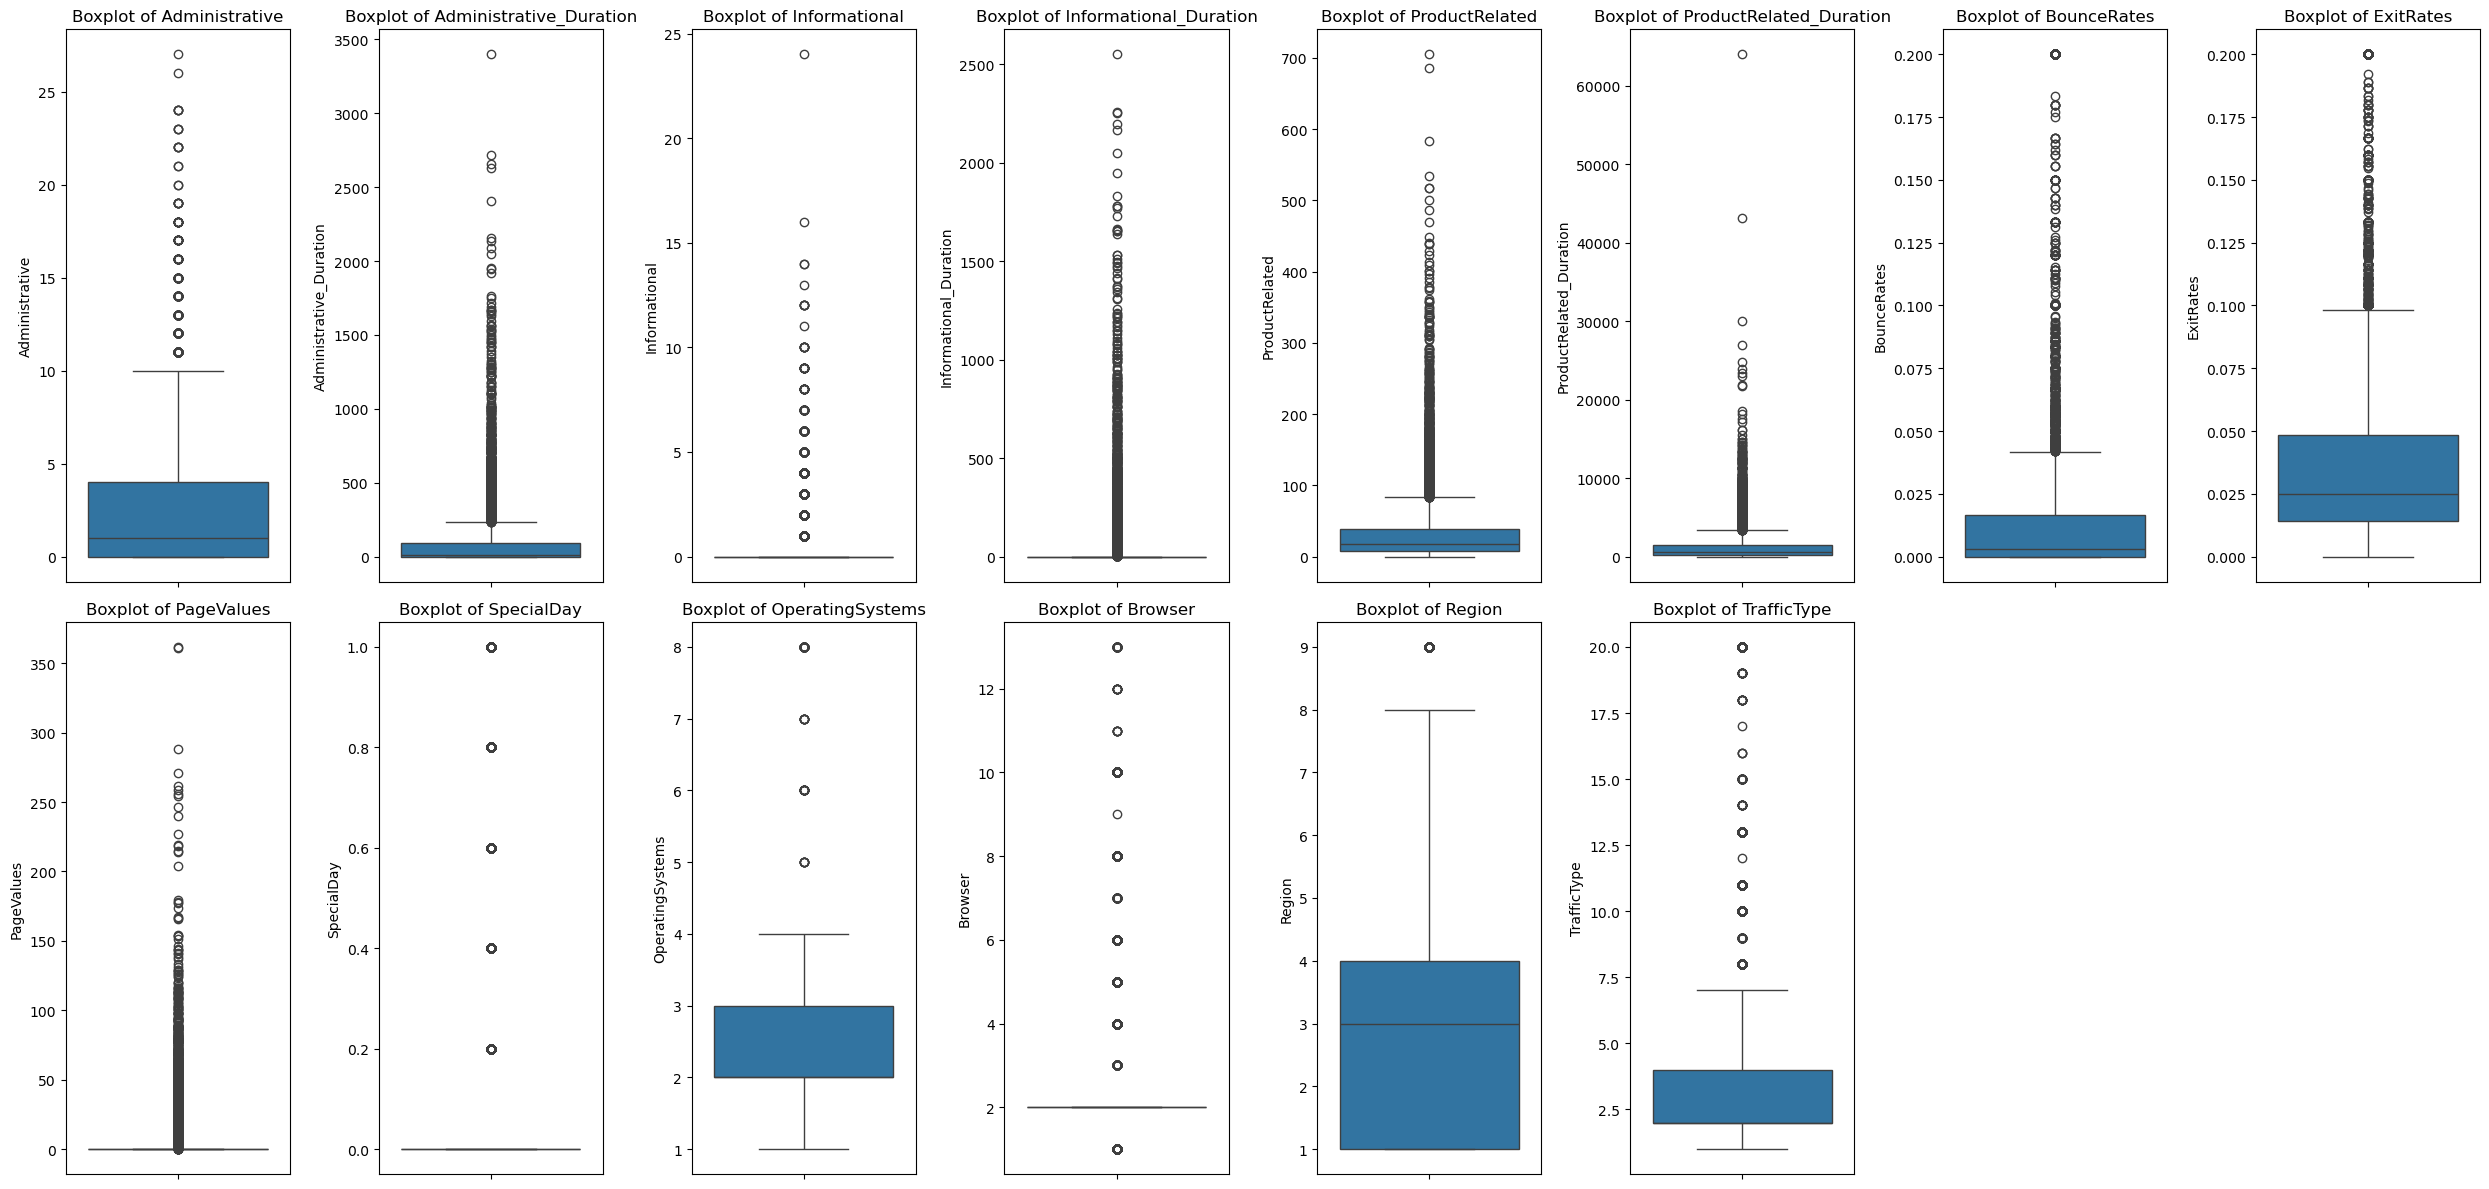

In [41]:


numerical_columns = df.select_dtypes('number').columns

# boxplots for each numerical column
plt.figure(figsize=(25, 12))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, len(numerical_columns)//2 + 1, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
plt.show()

##### **5.3.2 Outlier handling - IQR method**

In [43]:


# Calculate Q1, Q3, and IQR
numerical_data = df.select_dtypes('number')
Q1 = numerical_data.quantile(0.25)
Q3 = numerical_data.quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
filtered_df = df[~((numerical_data < lower_bound) | (numerical_data > upper_bound)).any(axis=1)]

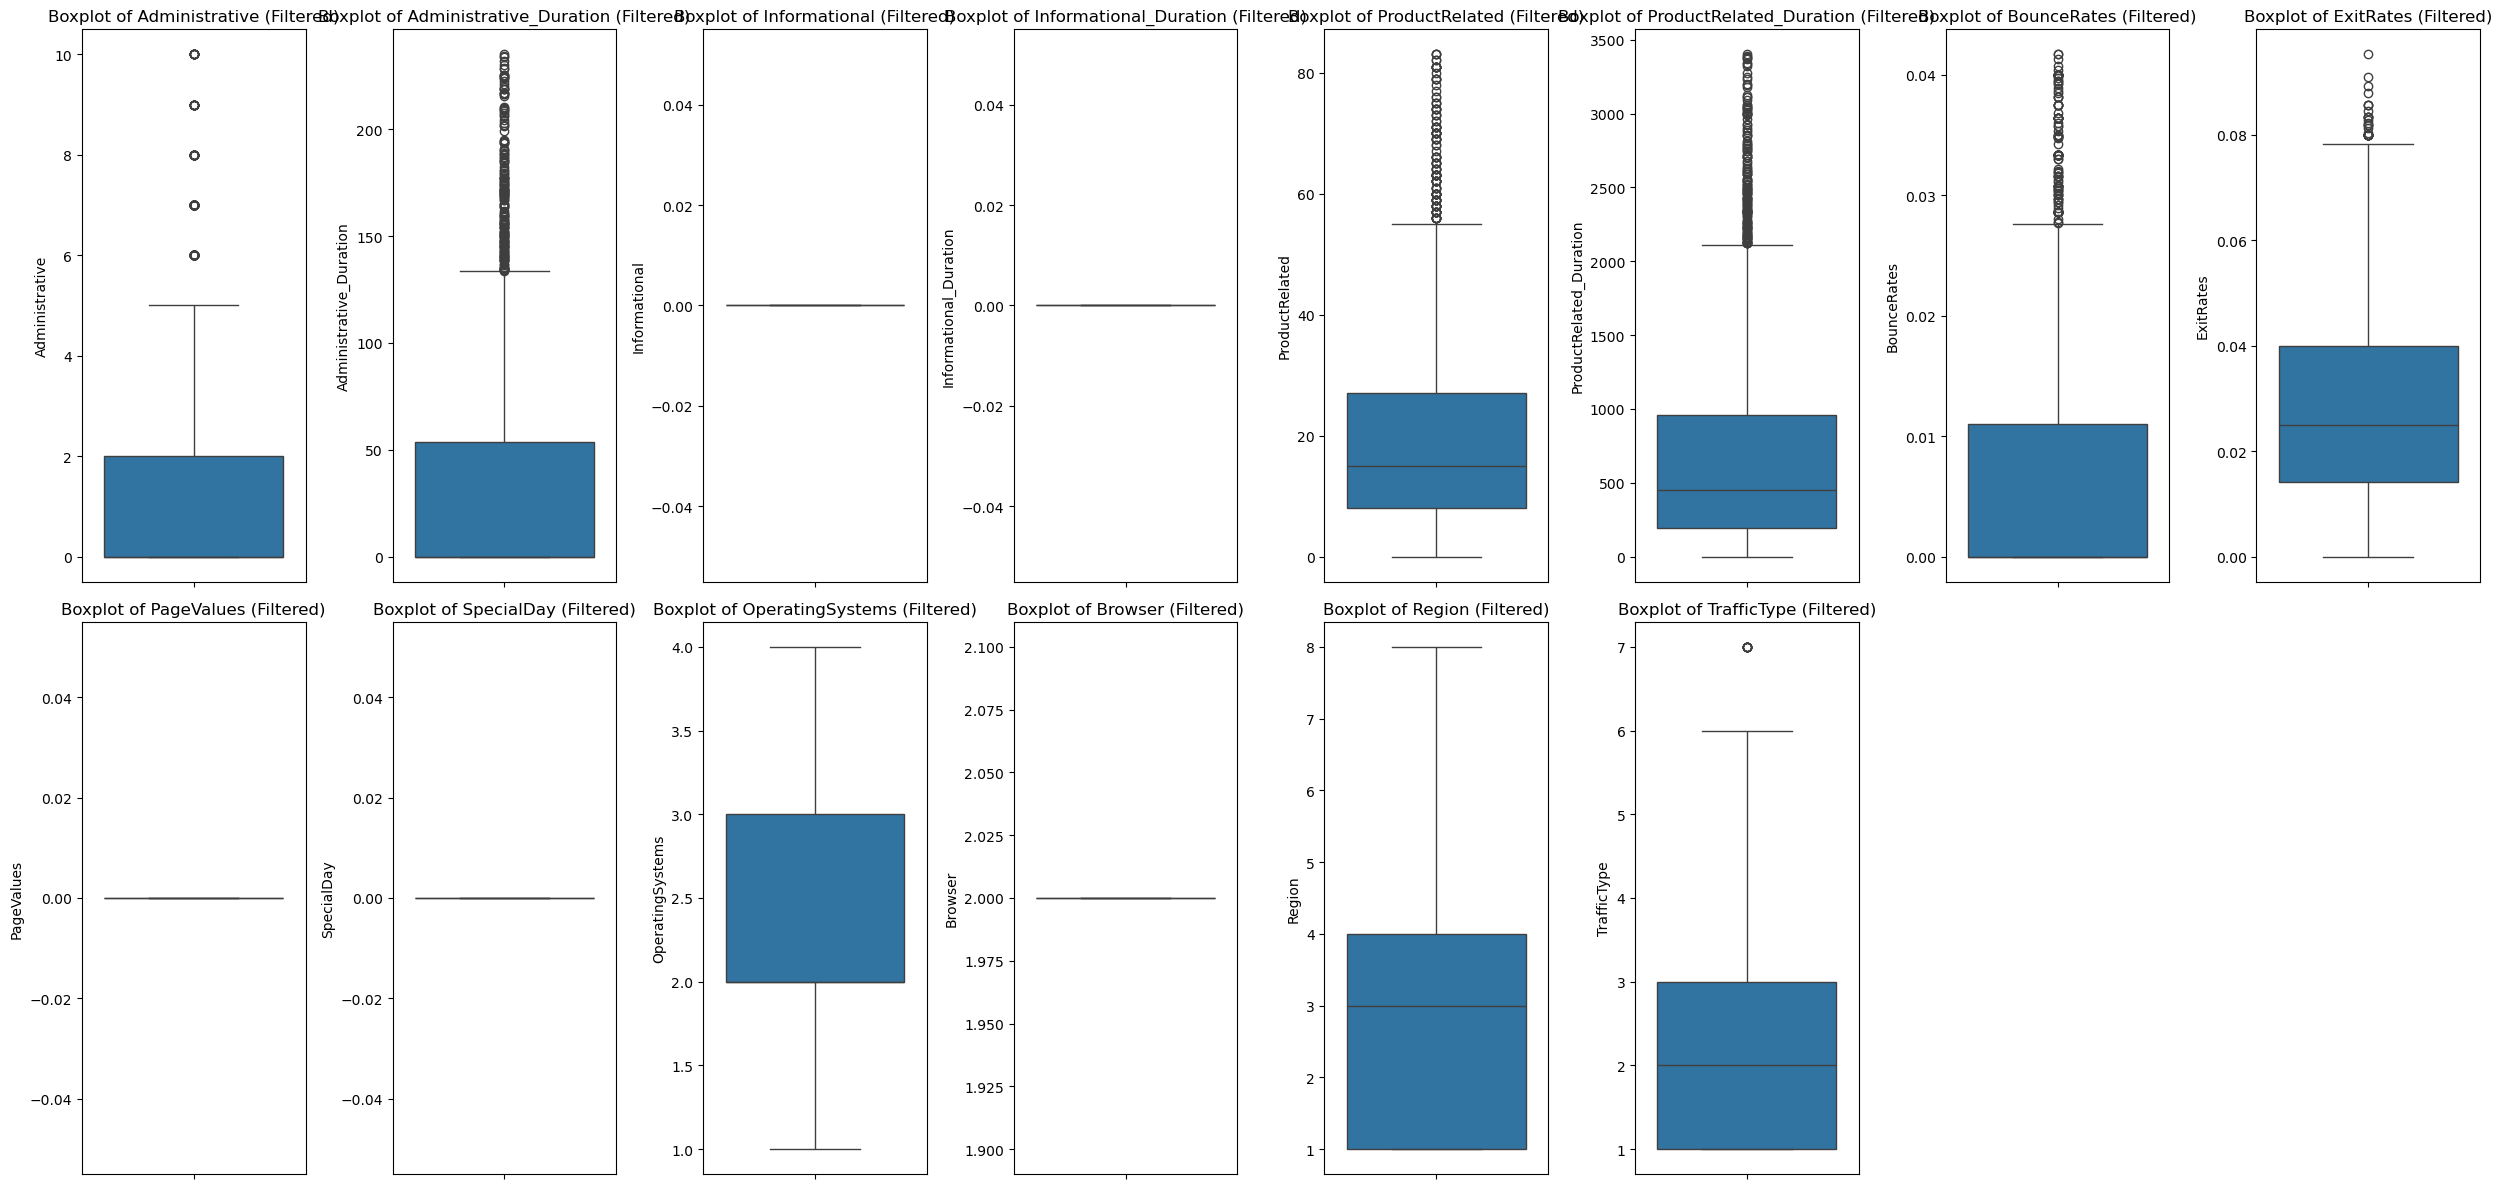

In [44]:
# Visualize the data after removing outliers
plt.figure(figsize=(25, 12))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, len(numerical_columns)//2 + 1, i)
    sns.boxplot(y=filtered_df[col])
    plt.title(f'Boxplot of {col} (Filtered)')
    plt.tight_layout()
plt.show()

##### **5.3.3  Skewness**

In [46]:
# Check skewness of data

skewness = df[numerical_columns].apply(skew)

# Display skewness
print("Skewness of numerical features:")
print(skewness)

# Identify highly skewed features
high_skew = skewness[abs(skewness) > 1]
print("\nHighly skewed features:")
print(high_skew)


Skewness of numerical features:
Administrative             1.946884
Administrative_Duration    5.591464
Informational              4.013679
Informational_Duration     7.539364
ProductRelated             4.332887
ProductRelated_Duration    7.252270
BounceRates                3.162036
ExitRates                  2.234370
PageValues                 6.350202
SpecialDay                 3.285498
OperatingSystems           2.032363
Browser                    3.217009
Region                     0.978360
TrafficType                1.958273
dtype: float64

Highly skewed features:
Administrative             1.946884
Administrative_Duration    5.591464
Informational              4.013679
Informational_Duration     7.539364
ProductRelated             4.332887
ProductRelated_Duration    7.252270
BounceRates                3.162036
ExitRates                  2.234370
PageValues                 6.350202
SpecialDay                 3.285498
OperatingSystems           2.032363
Browser                    3

##### **5.3.4 Handle Skewness**

In [48]:
# Handle skewness
# Transformations

# Create a copy for transformations
df_transformed = df.copy()

# Highly skewed features
high_skew_features = ['Administrative', 'Administrative_Duration', 'Informational', 
                      'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 
                      'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 
                      'OperatingSystems', 'Browser', 'TrafficType']

# Log Transformation : 
# features with high positive values
log_transform_features = ['Administrative_Duration', 'Informational_Duration', 
                          'ProductRelated_Duration', 'PageValues']

for col in log_transform_features:
    df_transformed[col] = np.log1p(df[col])  # Use log1p to handle zero values

# Square Root Transformation:
# moderately skewed features
sqrt_transform_features = ['Administrative', 'Informational', 'ProductRelated', 'SpecialDay']

for col in sqrt_transform_features:
    df_transformed[col] = np.sqrt(df[col])

# Box-Cox Transformation :
# features with positive skewness
boxcox_transform_features = ['BounceRates', 'ExitRates', 'OperatingSystems', 'Browser']

from scipy.stats import boxcox
for col in boxcox_transform_features:
    df_transformed[col], _ = boxcox(df[col] + 1)  # Add 1 to avoid issues with zero values

In [49]:
# Check Skewness After Transformation

# Recalculate skewness after transformation
new_skewness = df_transformed[high_skew_features].apply(skew)

print("Skewness after transformations:")
print(new_skewness)


Skewness after transformations:
Administrative             0.625226
Administrative_Duration    0.237254
Informational              1.933144
Informational_Duration     1.901872
ProductRelated             1.503169
ProductRelated_Duration   -1.426973
BounceRates                1.010904
ExitRates                  0.411191
PageValues                 1.789387
SpecialDay                 2.858300
OperatingSystems          -0.009847
Browser                   -0.001798
TrafficType                1.958273
dtype: float64


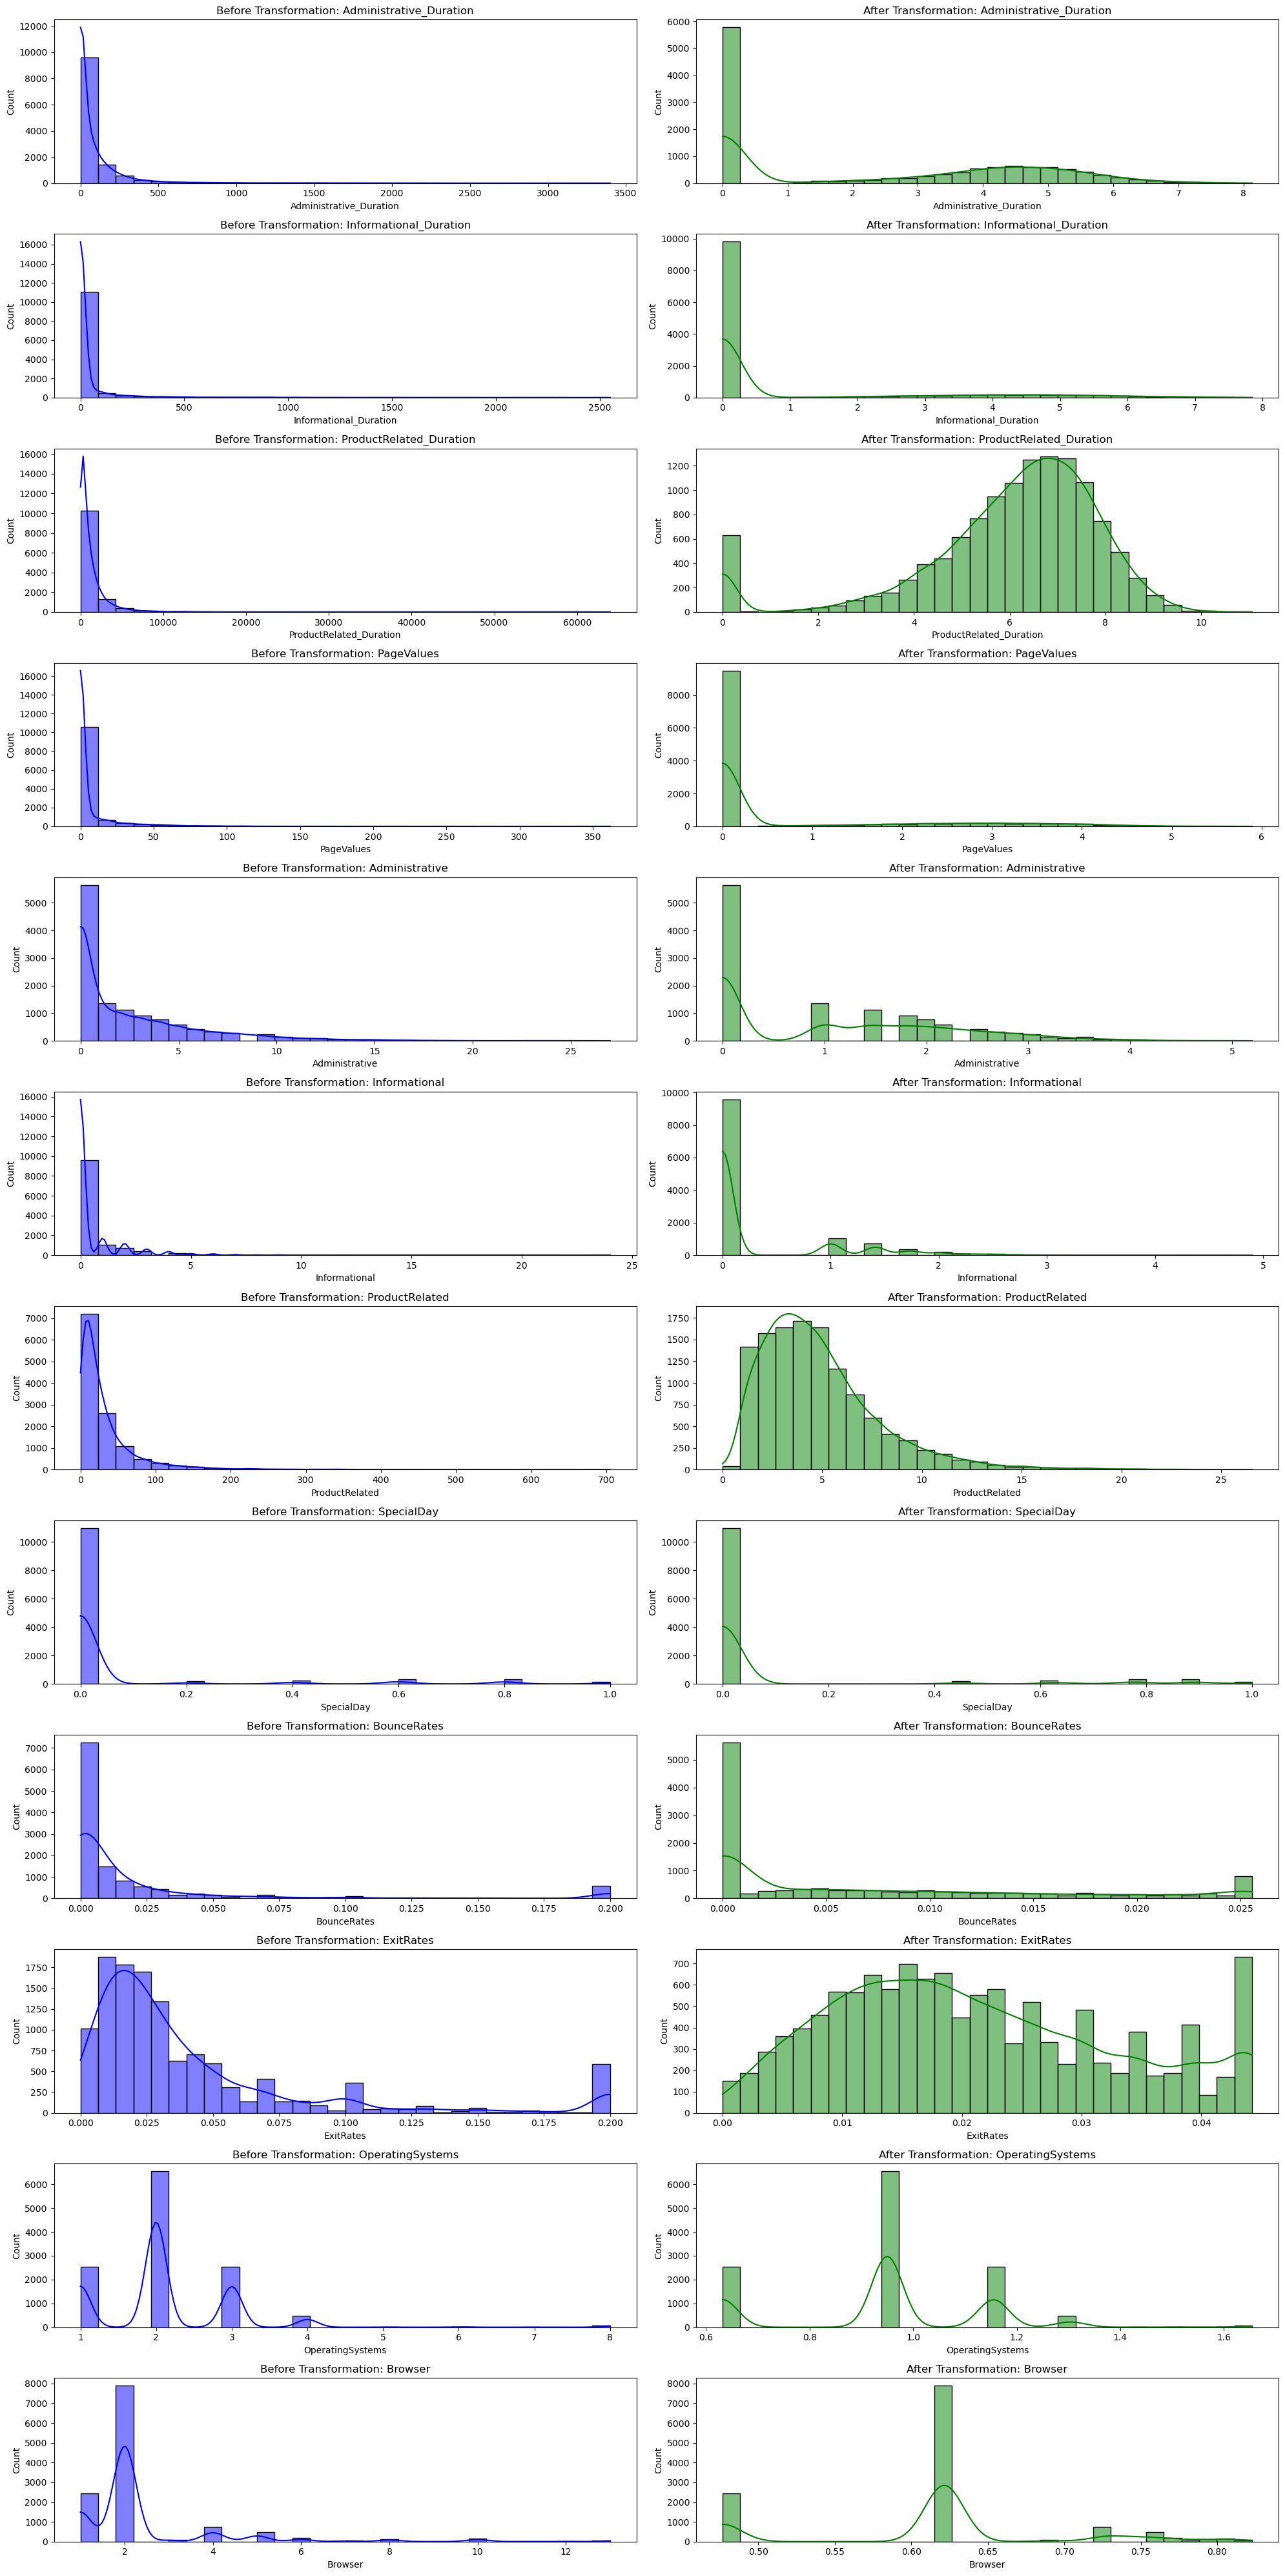

In [50]:
# Visualize Before and After Transformation 

# Combine all transformed features
transformed_features = log_transform_features + sqrt_transform_features + boxcox_transform_features


plt.figure(figsize=(20, 40))
for i, col in enumerate(transformed_features):
    # Original Distribution
    plt.subplot(len(transformed_features), 2, i * 2 + 1)
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f"Before Transformation: {col}")
    plt.xlabel(col)
    
    # Transformed Distribution
    plt.subplot(len(transformed_features), 2, i * 2 + 2)
    sns.histplot(df_transformed[col], kde=True, bins=30, color='green')
    plt.title(f"After Transformation: {col}")
    plt.xlabel(col)

plt.tight_layout()
plt.show()

### 6. **Exploratory Data Analysis (EDA):**

#### **6.1 Pair Plot**

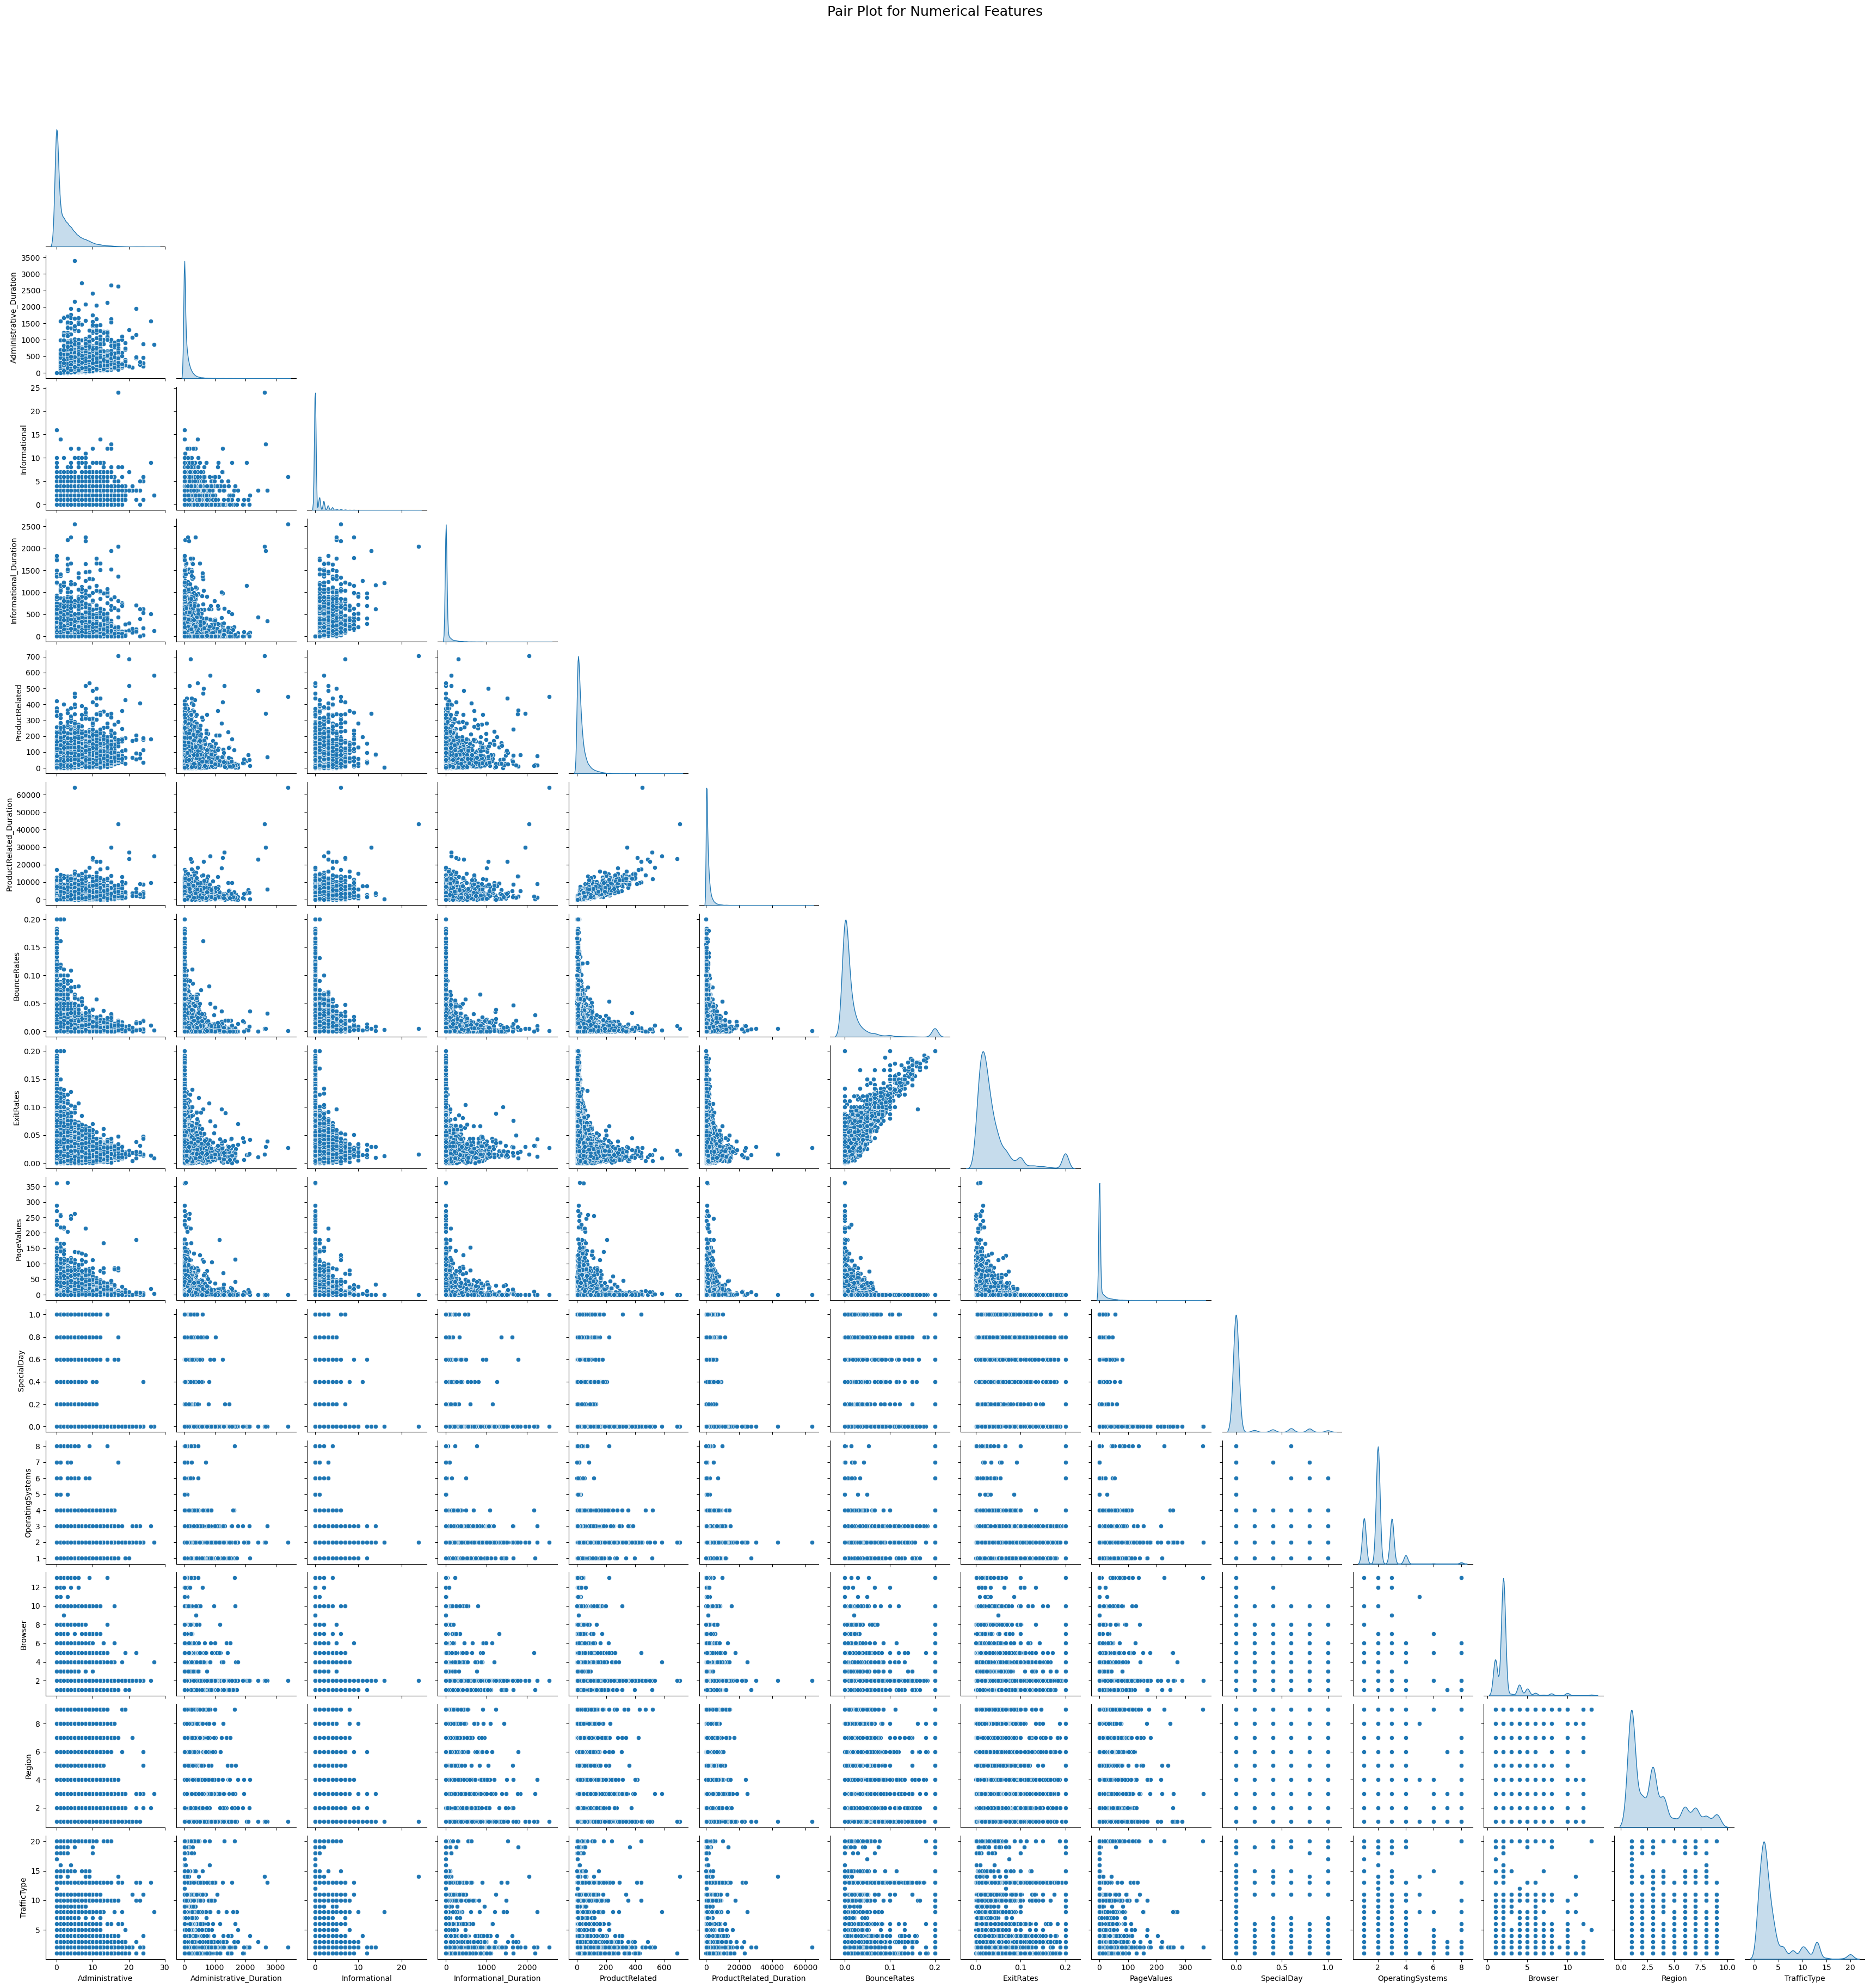

In [53]:

# To explore relationships between multiple numerical features.
sns.pairplot(df[numerical_columns], diag_kind='kde', corner=True)
plt.suptitle("Pair Plot for Numerical Features", fontsize=18, y=1.05)
plt.show()


#### **6.2 Heatmap Correlation**

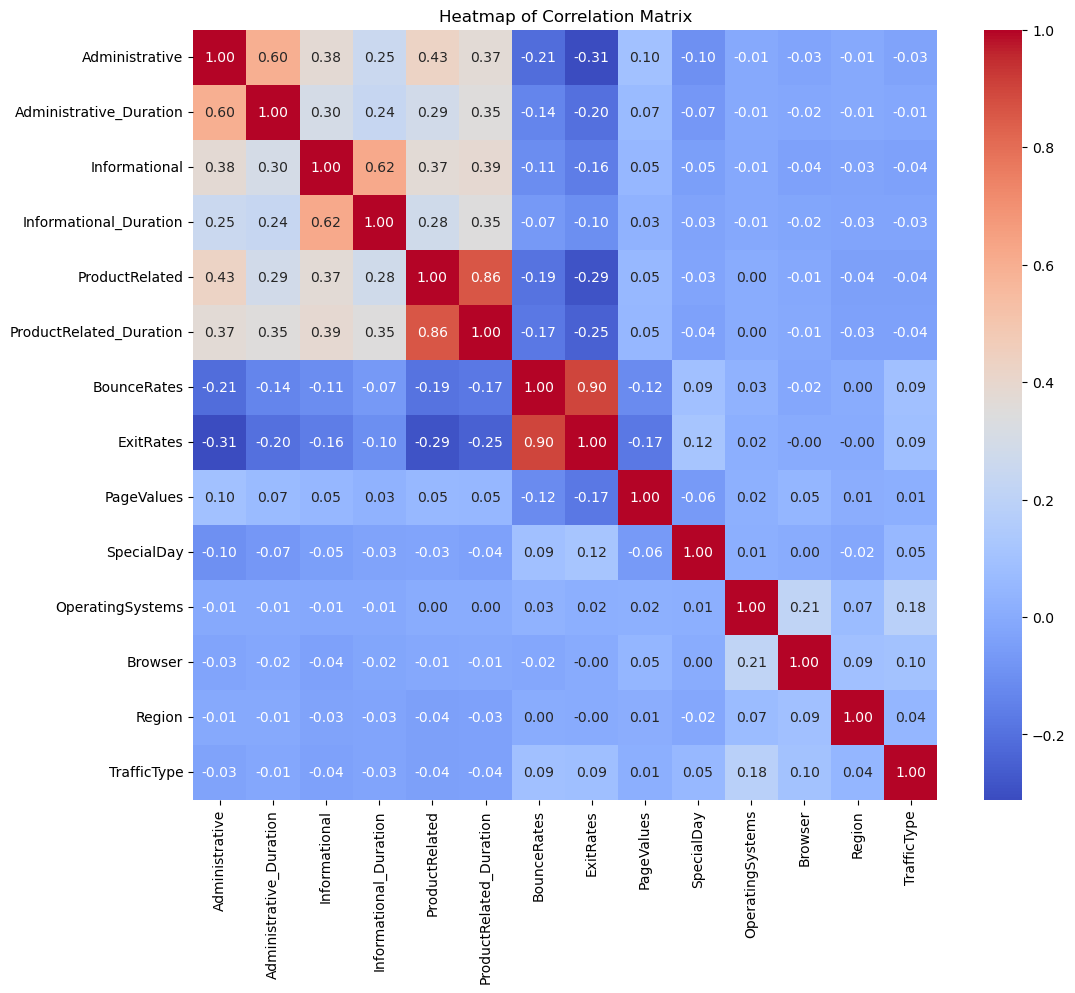

In [55]:

# To check for strong correlations or patterns among numerical features

# Compute correlation matrix
correlation_matrix = numerical_data.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Heatmap of Correlation Matrix", fontsize=12)
plt.show()


#### **6.3 Pie Diagram**

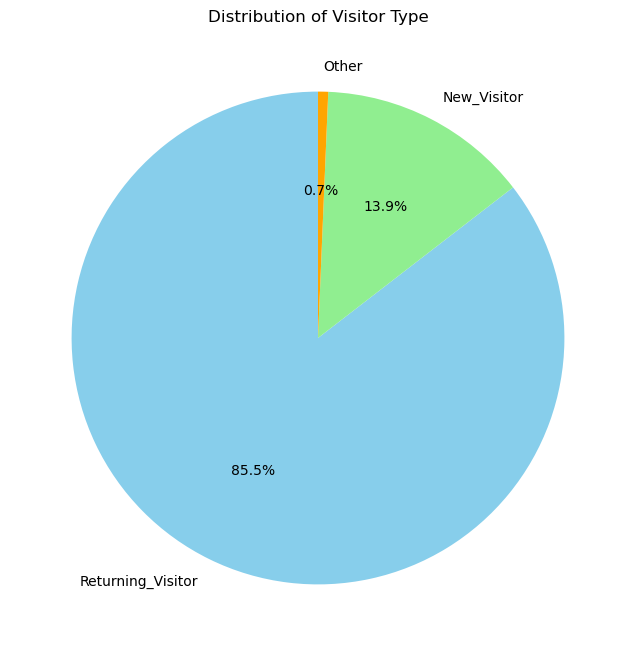

In [57]:

# To visualize proportions of categorical features.
# Example: Distribution of 'VisitorType'
plt.figure(figsize=(8, 8))
df['VisitorType'].value_counts().plot.pie(autopct="%1.1f%%", startangle=90, colors=['skyblue', 'lightgreen', 'orange'])
plt.title("Distribution of Visitor Type")
plt.ylabel("")
plt.show()


#### **6.4 Bar Plot**

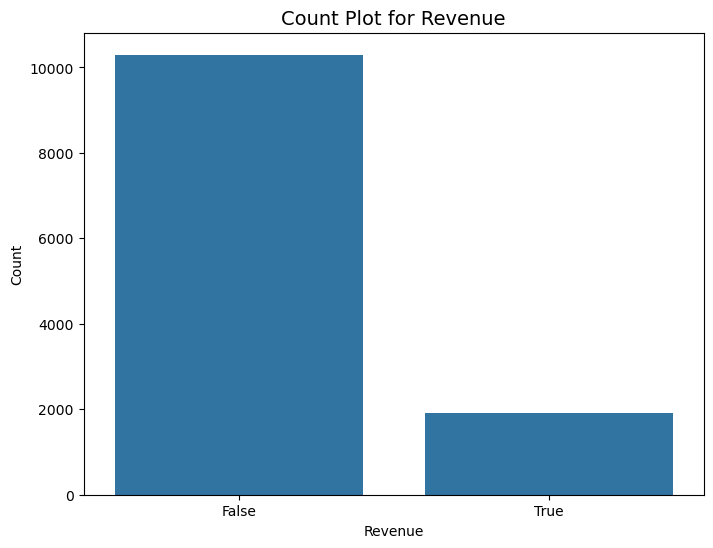

In [59]:

# To compare frequencies of categorical data or aggregated numerical data

# Example: Bar plot for 'Revenue' counts
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Revenue')
plt.title("Count Plot for Revenue", fontsize=14)
plt.xlabel("Revenue")
plt.ylabel("Count")
plt.show()

#### **6.5 Count Plot**

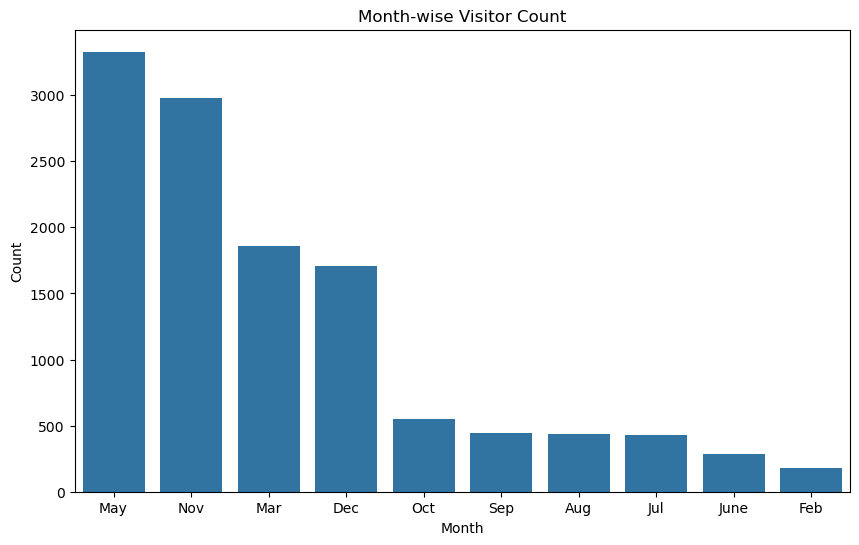

In [61]:

# To visualize the frequency distribution of categorical features.
# Example: Count plot for 'Month'

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Month', order=df['Month'].value_counts().index)
plt.title("Month-wise Visitor Count")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()


#### **6.6 Line Plot**

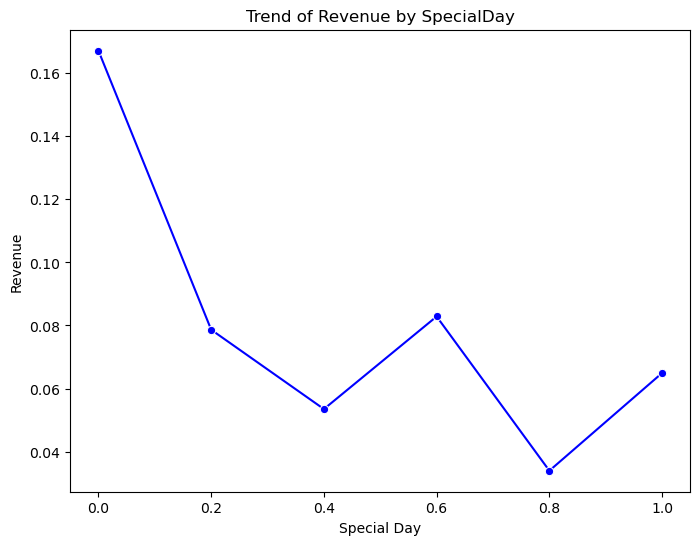

In [63]:

# To show trends over time or ordered categories.

# Example: Line plot of 'SpecialDay' vs. 'Revenue'
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x='SpecialDay', y='Revenue', errorbar=None, marker='o', color='blue')
plt.title("Trend of Revenue by SpecialDay")
plt.xlabel("Special Day")
plt.ylabel("Revenue")
plt.show()

#### **6.7 Bivariate Distribution** 

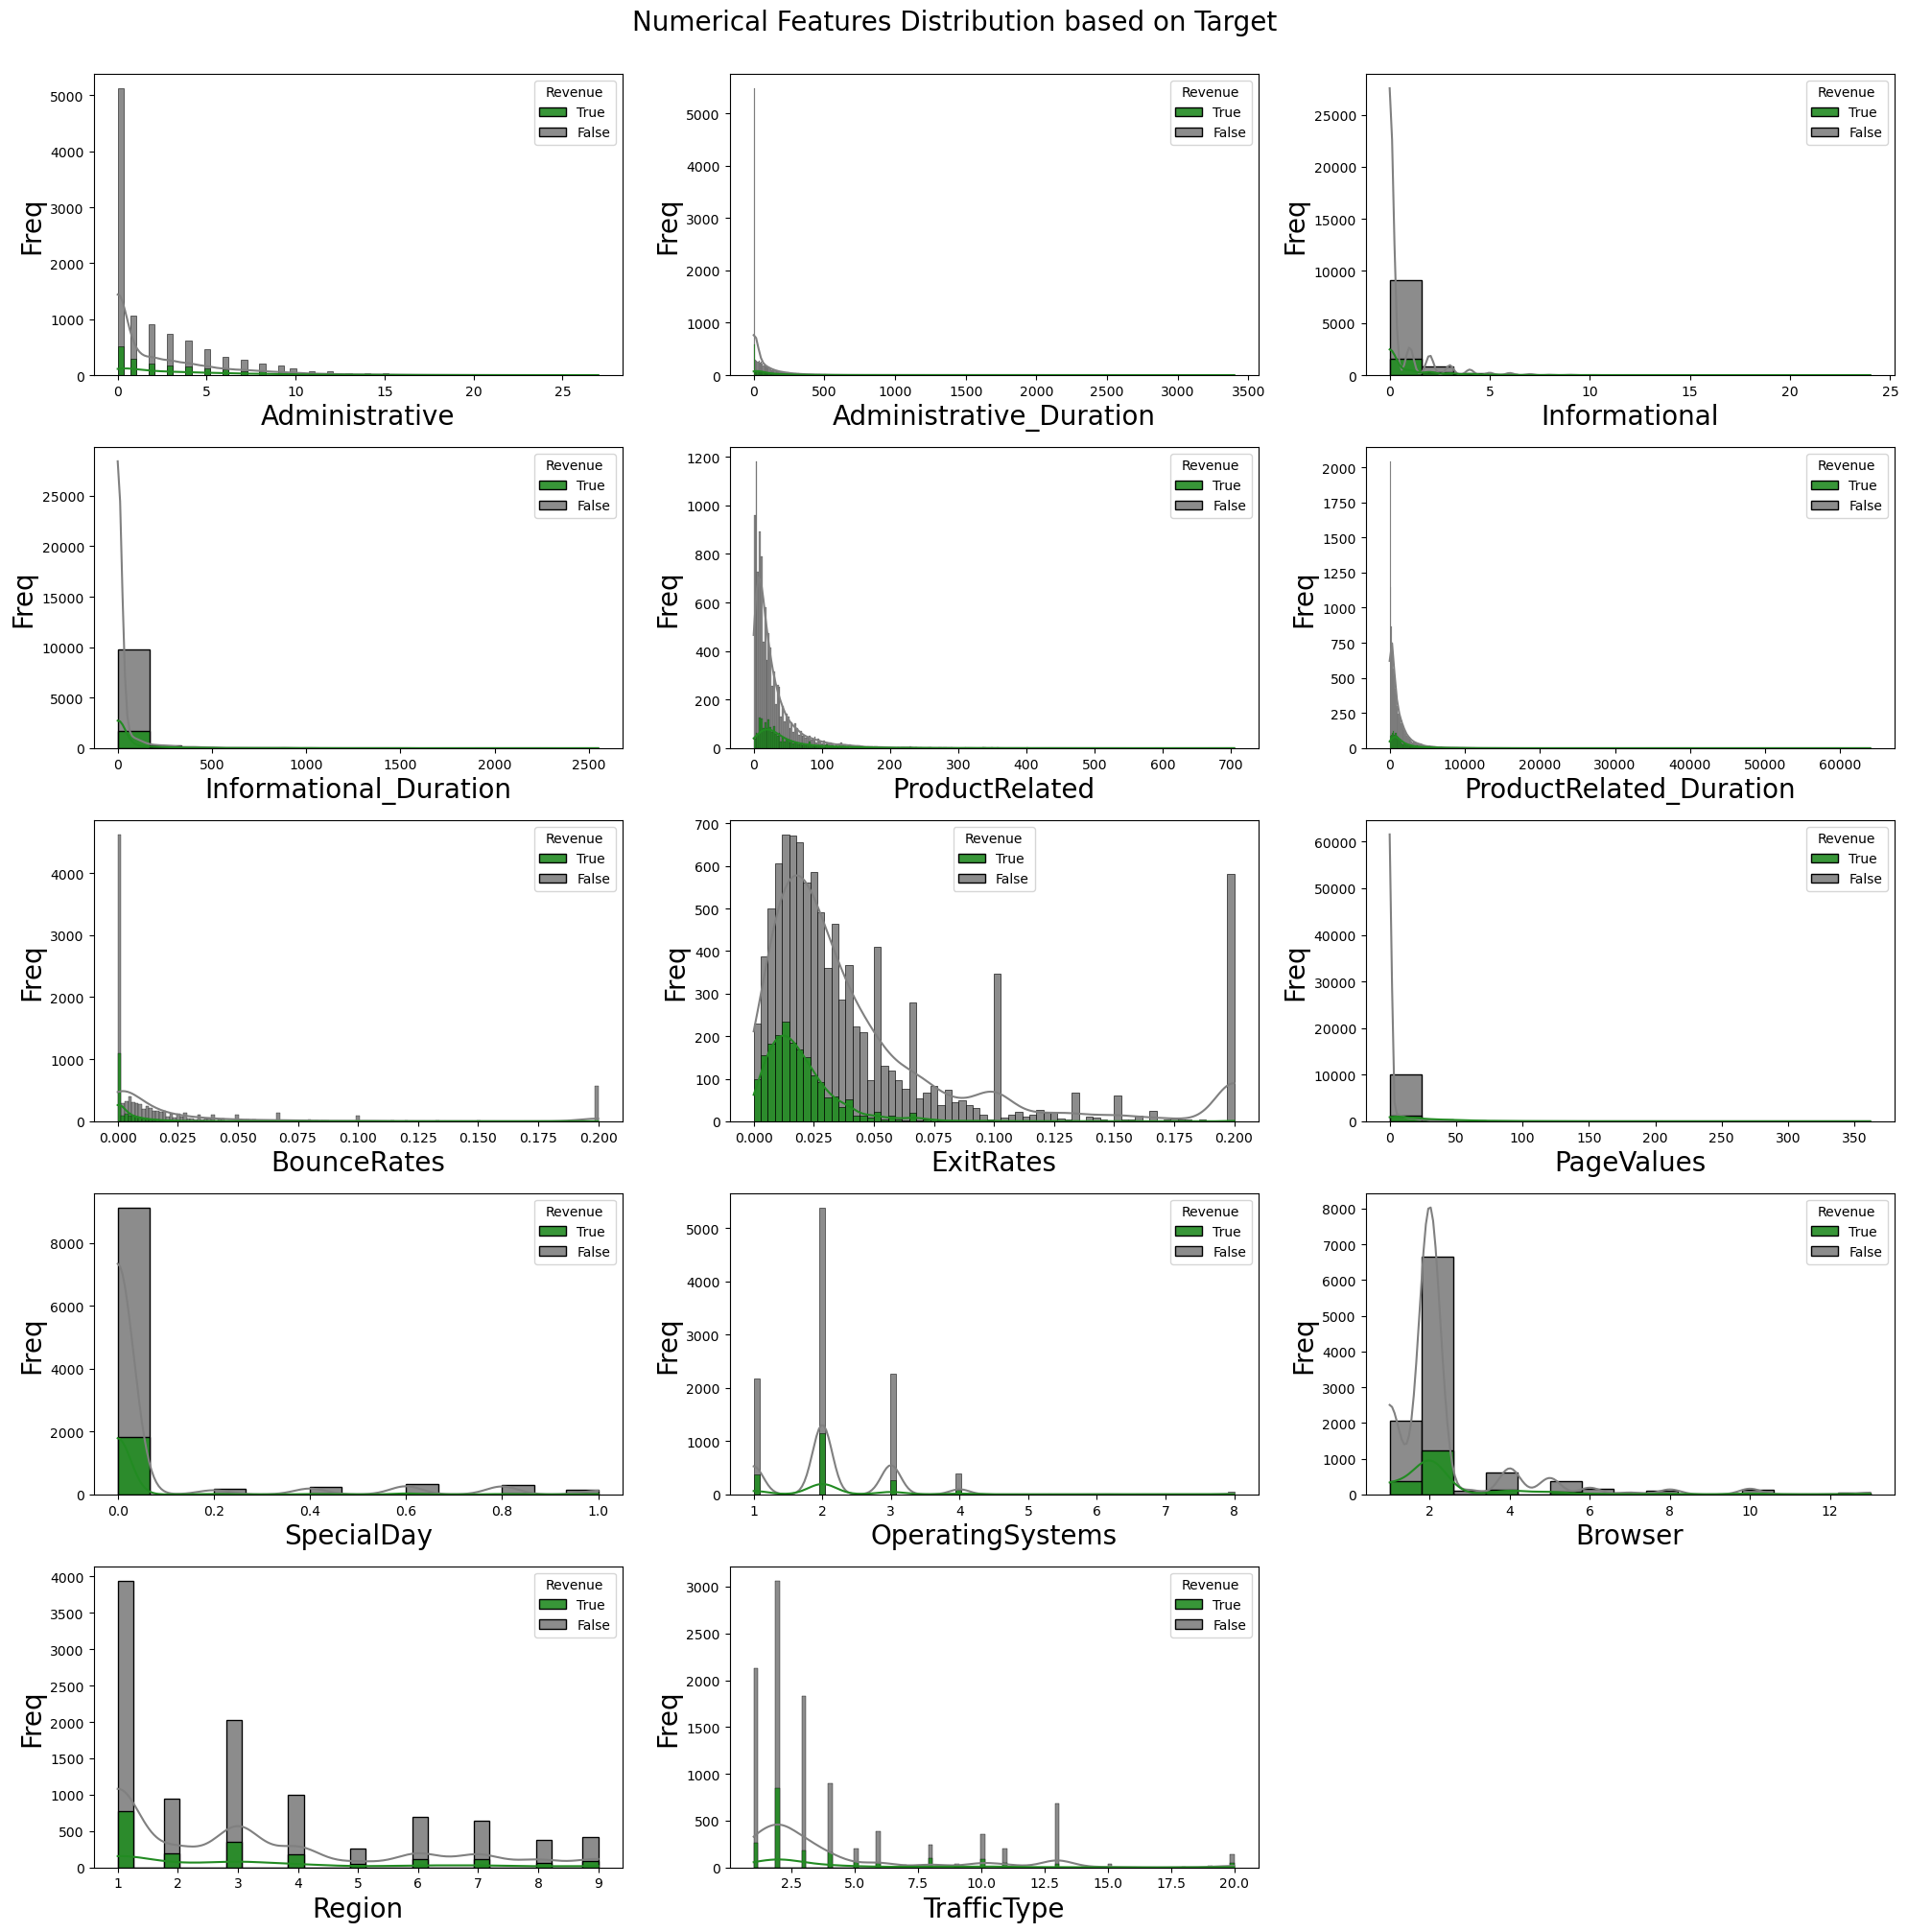

In [65]:

# Checking the distribution of the numerical feature with its target variable (Revenue).
# Those who ended up buying or revenue class = 1, are in green. Those who didn't end up buying represented by the color gray.

palette = {True : '#228B22', False : '#808080'}

plt.figure(figsize=(20, 20))
plt.suptitle('Numerical Features Distribution based on Target', fontsize = 20, y = 1.005)
for i in range(len(numerical_columns)):
    plt.subplot(len(numerical_columns)//3+1, 3, i+1)
    ax = sns.histplot(
        x = df[numerical_columns[i]],
        kde = True,
        hue = df['Revenue'],
        hue_order = [True, False],
        palette = palette, alpha = 0.9
    )
    ax.set_xlabel(numerical_columns[i], fontsize = 20)
    ax.set_ylabel("Freq", fontsize = 20)
plt.tight_layout()
plt.show()


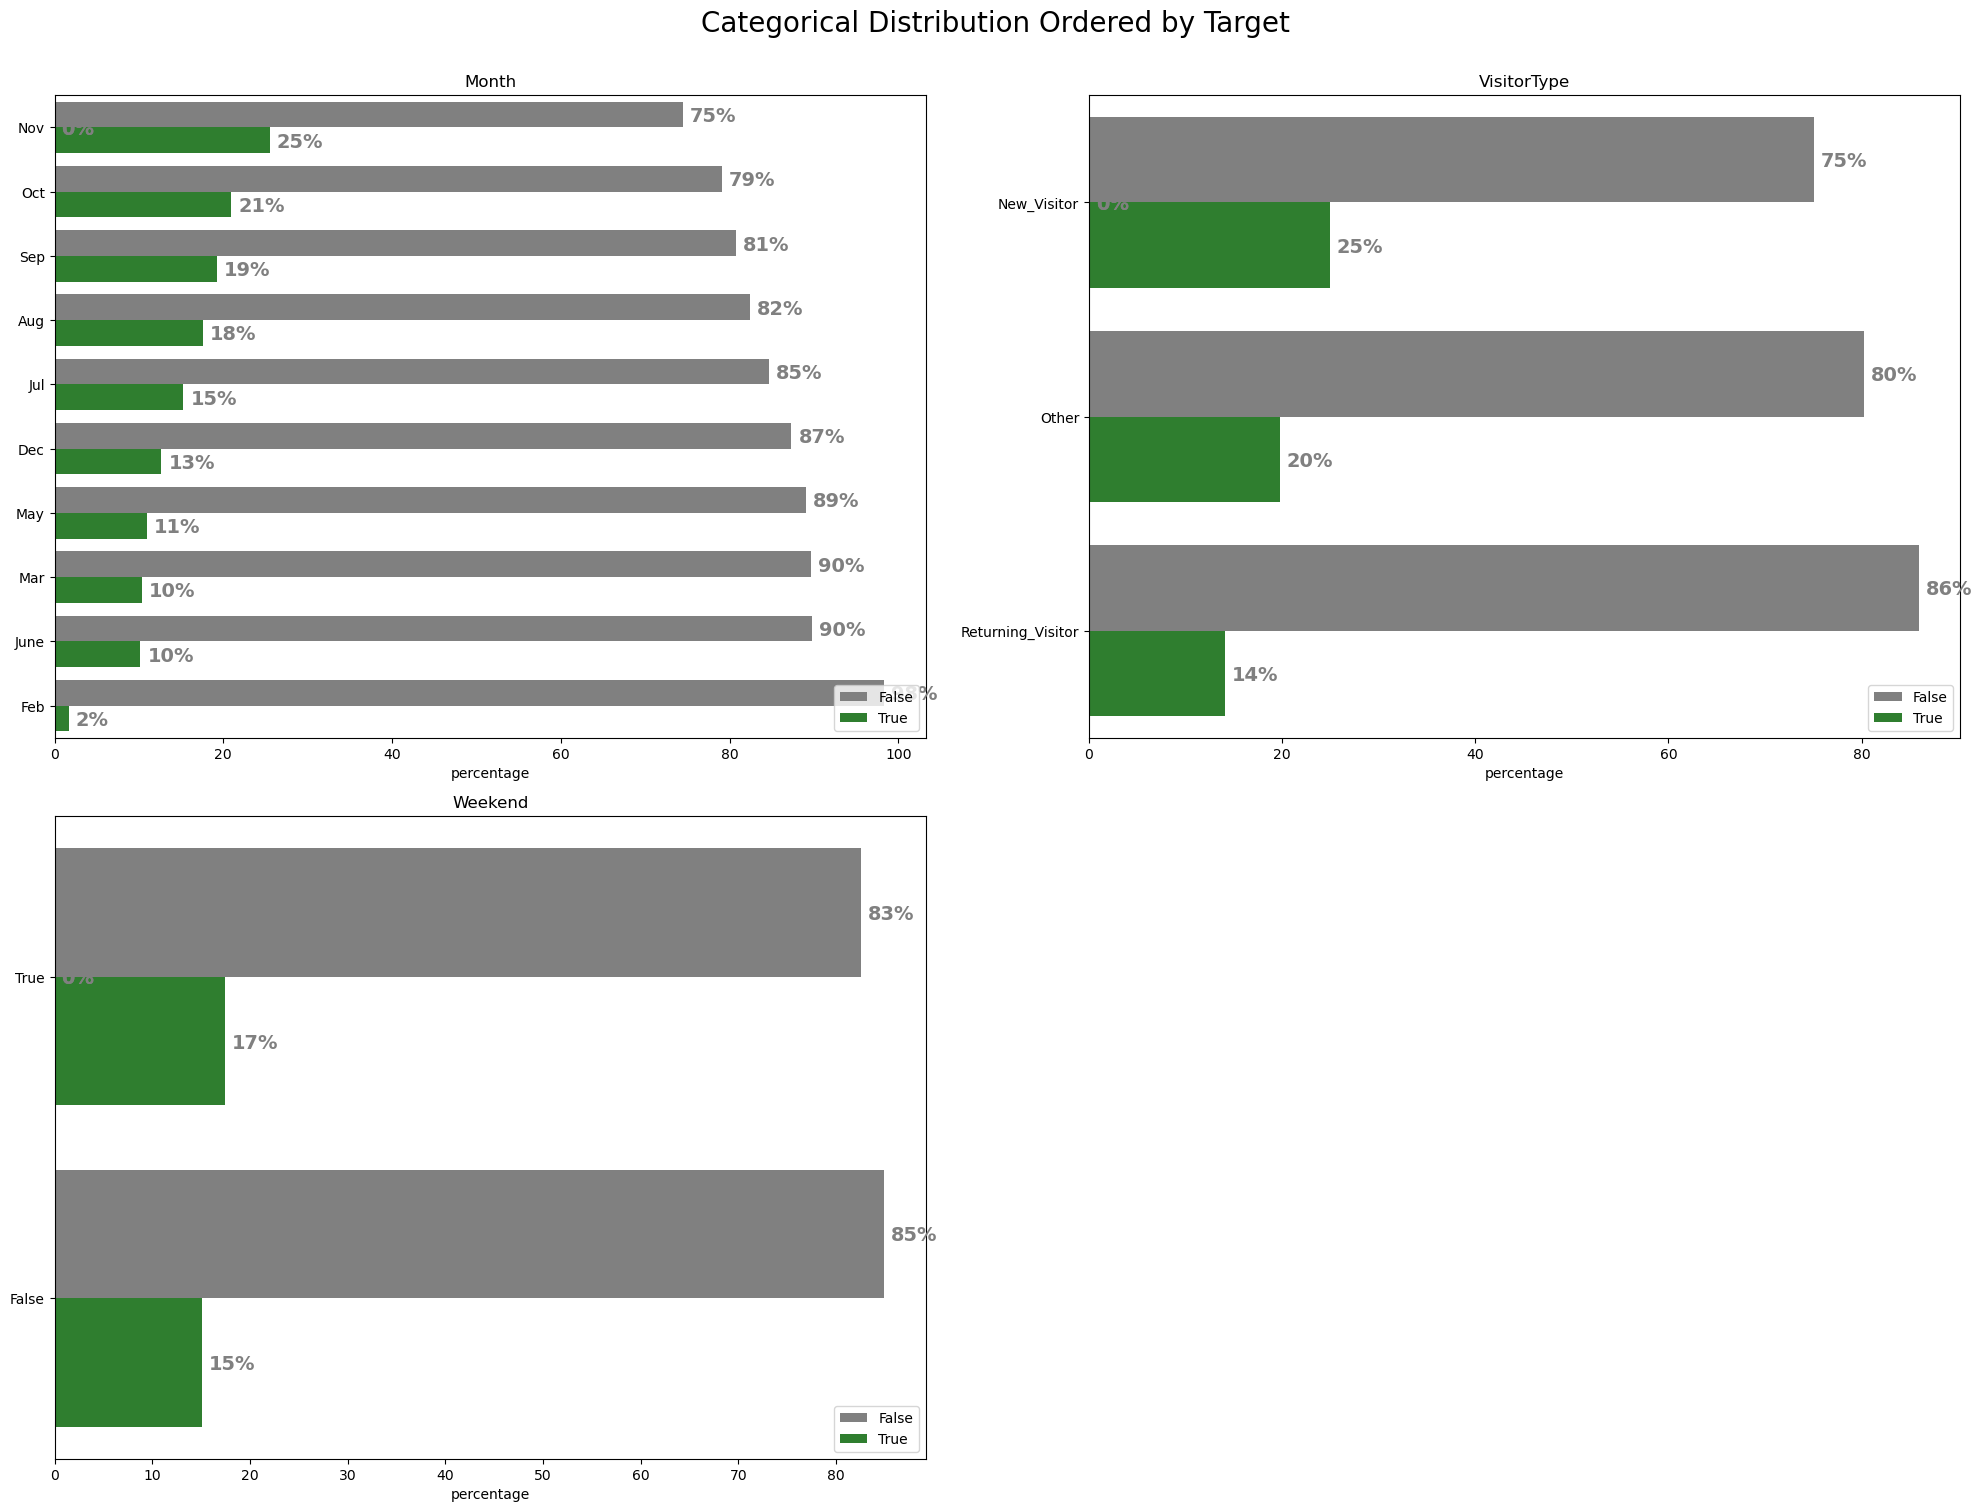

In [66]:
# Categorical Distribution Ordered by Target (Revenue)

categorical_cols = df.drop(columns=['Revenue']).select_dtypes([object, bool]).columns.tolist()

plt.figure(figsize=(20, 15))
plt.suptitle('Categorical Distribution Ordered by Target', fontsize=20, y = 1.005)
for i in range(len(categorical_cols)):
    
    # create percentage df
    dist = df.groupby([str(categorical_cols[i]), "Revenue"]).count()[["Administrative"]]
    cat_group = df.groupby([str(categorical_cols[i])]).count()[["Administrative"]]
    dist["percentage"] = dist.div(cat_group, level = str(categorical_cols[i])) * 100
    dist.reset_index(inplace = True)
    dist.columns = [str(categorical_cols[i]), "Revenue", "count", "percentage"]
    
    if dist.columns[0] == 'Weekend':
        dist['Weekend'] = dist['Weekend'].astype(str)
    # plot
    plt.subplot(len(categorical_cols)//2+1, 2, i+1)
    ax = sns.barplot(
        x = "percentage",
        y = str(categorical_cols[i]),
        data = dist,
        hue = 'Revenue',
        order = dist.iloc[dist[dist['Revenue'] == True]['percentage'].sort_values(ascending = False).index][str(categorical_cols[i])],
        palette = palette
    )
    ax.set_ylabel('')
    ax.set_title(categorical_cols[i])
    
    for p in ax.patches:
        ax.annotate(
            format(p.get_width(), '.0f') + "%",
            (p.get_width(), p.get_y() + p.get_height() / 2.), 
            ha = 'left',
            fontweight = "bold",
            xytext = (5,-5), 
            textcoords = 'offset points',
            color = 'gray', fontsize=14
        )
    ax.legend(loc = 'lower right')
plt.tight_layout()
plt.show()

### **7. Feature Engineering**

#### **7.1  Label Encoding**

In [87]:

#taking a copy of dataframe
df_encoder=df_transformed.copy()


# Apply Label Encoding on 
label_encoder = LabelEncoder()
for col in categorical_cols:
    df_encoder[col] = label_encoder.fit_transform(df[col])


joblib.dump(df_encoder, 'label_encoders.pkl')

print("Encoders saved successfully!")

# Check the transformed DataFrame
print(df_encoder[categorical_cols].head())


Encoders saved successfully!
   Month  VisitorType  Weekend
0      2            2        0
1      2            2        0
2      2            2        0
3      2            2        0
4      2            2        1


### **8. Feature Selection**

#### **8.1 Random Forest for Feature Importance**

                    Feature  Importance
8                PageValues    0.384021
5   ProductRelated_Duration    0.091678
7                 ExitRates    0.086698
4            ProductRelated    0.073025
1   Administrative_Duration    0.057650
6               BounceRates    0.056459
10                    Month    0.042989
0            Administrative    0.041498
14              TrafficType    0.030913
13                   Region    0.029900


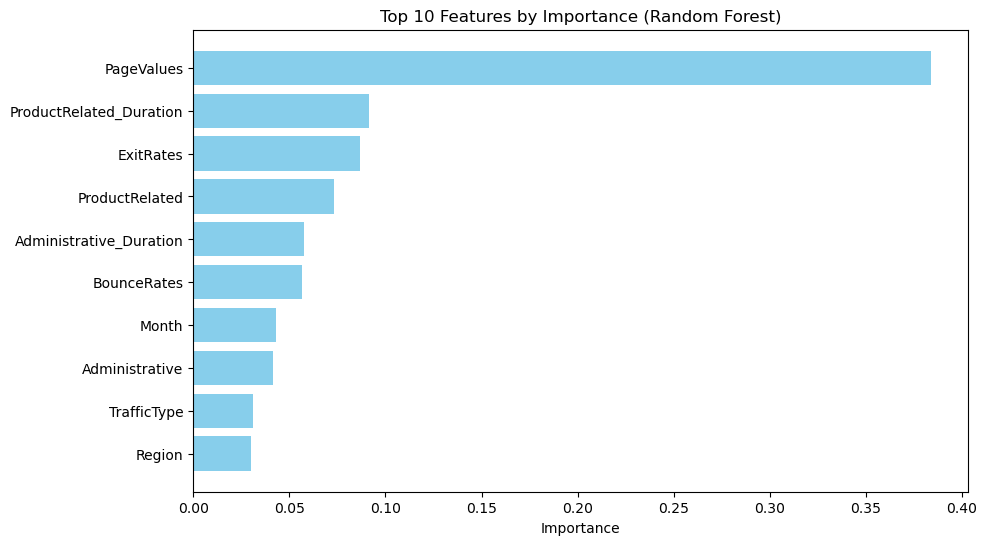

In [91]:

# Separate features and target
X = df_encoder.drop(columns=['Revenue'])  
y = df_encoder['Revenue']

# Build Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

# Extract Feature Importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display top features
print(feature_importances.head(10))

# Plot Feature Importance

plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'][:10], feature_importances['Importance'][:10], color='skyblue')
plt.gca().invert_yaxis()
plt.title('Top 10 Features by Importance (Random Forest)')
plt.xlabel('Importance')
plt.show()

#### **8.2 Compare and Remove Redundant/Irrelevant Features**

In [93]:


# Select features based on threshold (Random Forest)
threshold = 0.01  # Set importance threshold
selected_rf_features = feature_importances[feature_importances['Importance'] > threshold]['Feature']


final_features = list(set(selected_rf_features))
print("Final Selected Features:", final_features)

# Update DataFrame with selected features
X_final = X[final_features]


Final Selected Features: ['ExitRates', 'Browser', 'ProductRelated', 'Informational_Duration', 'Administrative', 'OperatingSystems', 'Weekend', 'ProductRelated_Duration', 'BounceRates', 'VisitorType', 'Administrative_Duration', 'TrafficType', 'Month', 'Region', 'PageValues', 'Informational']


### **9. Feature Scaling**

In [95]:
# Define numerical columns for scaling (exclude categorical/encoded features)
numerical_cols = [
    'Administrative', 'Administrative_Duration', 'Informational', 
    'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 
    'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay'
]
# Define categorical features (encoded or ordinal)
categorical_cols = ['Month', 'VisitorType', 'Weekend', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']



#### **9.1 Min-max Scaling**

In [97]:

# Scale numerical features only
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_encoder[numerical_cols] = scaler.fit_transform(df_encoder[numerical_cols])
#saving the scaler
joblib.dump(df_encoder, 'min_max_scaler.pkl')


['min_max_scaler.pkl']

In [98]:
df_encoder[numerical_cols].head().T


0         1         2         3         4
Administrative           0.000000  0.000000  0.000000  0.000000  0.000000
Administrative_Duration  0.000000  0.000000  0.000000  0.000000  0.000000
Informational            0.000000  0.000000  0.000000  0.000000  0.000000
Informational_Duration   0.000000  0.000000  0.000000  0.000000  0.000000
ProductRelated           0.037662  0.053262  0.037662  0.053262  0.119098
ProductRelated_Duration  0.000000  0.377218  0.000000  0.117410  0.582252
BounceRates              1.000000  0.000000  1.000000  0.852181  0.539297
ExitRates                1.000000  0.895129  1.000000  0.962277  0.673264
PageValues               0.000000  0.000000  0.000000  0.000000  0.000000
SpecialDay               0.000000  0.000000  0.000000  0.000000  0.000000

In [99]:
df_encoder[categorical_cols].head().T

0         1         2         3         4
Month             2.000000  2.000000  2.000000  2.000000  2.000000
VisitorType       2.000000  2.000000  2.000000  2.000000  2.000000
Weekend           0.000000  0.000000  0.000000  0.000000  1.000000
OperatingSystems  0.631798  0.949834  1.303728  1.155158  1.155158
Browser           0.476538  0.621517  0.476538  0.621517  0.690059
Region            1.000000  1.000000  9.000000  2.000000  1.000000
TrafficType       1.000000  2.000000  3.000000  4.000000  4.000000

### **10. Split Data into Training and Testing Sets**

In [101]:

# Features (selected ones) and Target
X = X_final  # Use the final selected features
y = df_encoder['Revenue']  # Target variable


#Target variable Revenue is an imbalanced class. (e.g., significantly more False than True), 
#using stratified sampling to maintain the same class distribution in both training and testing sets

# Stratified split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check class distribution
print("Training Set Class Distribution:")
print(y_train.value_counts(normalize=True))

print("\nTesting Set Class Distribution:")
print(y_test.value_counts(normalize=True))

# Display the shapes of the splits
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Target Shape:", y_train.shape)
print("Testing Target Shape:", y_test.shape)

Training Set Class Distribution:
Revenue
False    0.843712
True     0.156288
Name: proportion, dtype: float64

Testing Set Class Distribution:
Revenue
False    0.843507
True     0.156493
Name: proportion, dtype: float64
Training Features Shape: (9764, 16)
Testing Features Shape: (2441, 16)
Training Target Shape: (9764,)
Testing Target Shape: (2441,)


### 11. **Build the ML Model:**


In [103]:

# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(class_weight='balanced', random_state=42),
    'SVM': SVC(kernel='linear', probability=True, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'MLP Classifier': MLPClassifier(random_state=42, max_iter=300),
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Gradient Boost': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42, algorithm='SAMME')
}

# Train classifiers and store results
trained_models = {}

for name, clf in classifiers.items():
    print(f"Training {name}...")
    clf.fit(X_train, y_train)  # Train the model
    trained_models[name] = clf  # Save the trained model
print("\nTraining Complete!")


Training Logistic Regression...
Training SVM...
Training Decision Tree...
Training MLP Classifier...
Training Naive Bayes...
Training Random Forest...
Training K-Nearest Neighbors...
Training Gradient Boost...
Training AdaBoost...

Training Complete!


In [104]:
#Saving trained models
import joblib
joblib.dump(trained_models, "trained_models.pkl")  


['trained_models.pkl']

### 12. **Model Evaluation:**


Evaluating Logistic Regression...
Accuracy: 0.88
Confusion Matrix:
 [[1836  223]
 [  80  302]]
Classification Report:
               precision    recall  f1-score   support

 No Purchase       0.96      0.89      0.92      2059
    Purchase       0.58      0.79      0.67       382

    accuracy                           0.88      2441
   macro avg       0.77      0.84      0.79      2441
weighted avg       0.90      0.88      0.88      2441

ROC AUC: 0.91


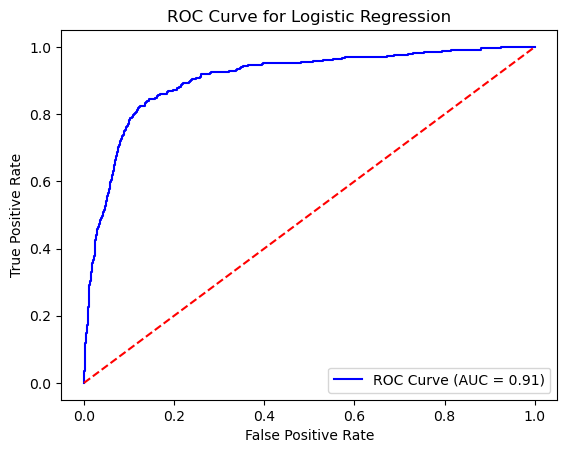


Evaluating SVM...
Accuracy: 0.89
Confusion Matrix:
 [[1925  134]
 [ 131  251]]
Classification Report:
               precision    recall  f1-score   support

 No Purchase       0.94      0.93      0.94      2059
    Purchase       0.65      0.66      0.65       382

    accuracy                           0.89      2441
   macro avg       0.79      0.80      0.80      2441
weighted avg       0.89      0.89      0.89      2441

ROC AUC: 0.86


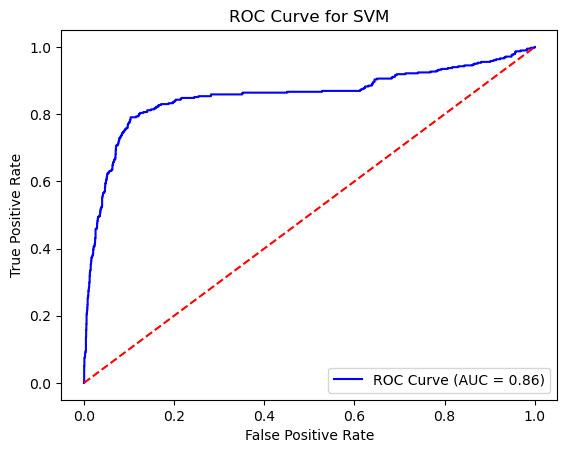


Evaluating Decision Tree...
Accuracy: 0.86
Confusion Matrix:
 [[1880  179]
 [ 155  227]]
Classification Report:
               precision    recall  f1-score   support

 No Purchase       0.92      0.91      0.92      2059
    Purchase       0.56      0.59      0.58       382

    accuracy                           0.86      2441
   macro avg       0.74      0.75      0.75      2441
weighted avg       0.87      0.86      0.86      2441

ROC AUC: 0.75


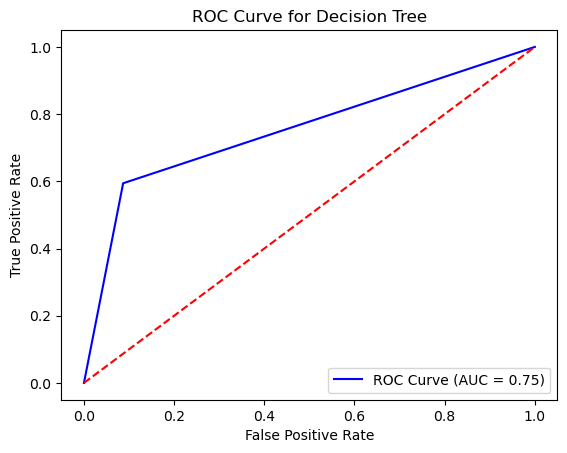


Evaluating MLP Classifier...
Accuracy: 0.90
Confusion Matrix:
 [[1939  120]
 [ 136  246]]
Classification Report:
               precision    recall  f1-score   support

 No Purchase       0.93      0.94      0.94      2059
    Purchase       0.67      0.64      0.66       382

    accuracy                           0.90      2441
   macro avg       0.80      0.79      0.80      2441
weighted avg       0.89      0.90      0.89      2441

ROC AUC: 0.91


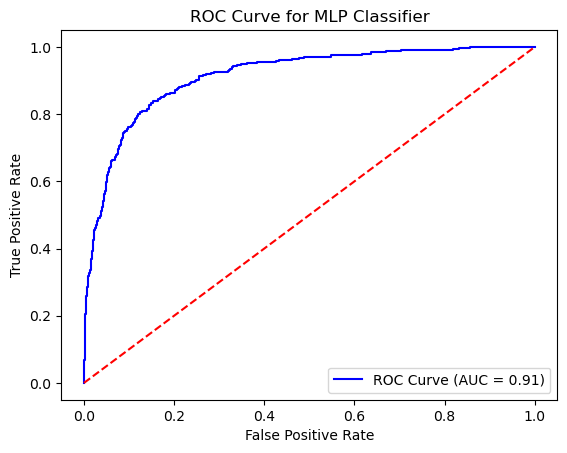


Evaluating Naive Bayes...
Accuracy: 0.84
Confusion Matrix:
 [[1746  313]
 [  76  306]]
Classification Report:
               precision    recall  f1-score   support

 No Purchase       0.96      0.85      0.90      2059
    Purchase       0.49      0.80      0.61       382

    accuracy                           0.84      2441
   macro avg       0.73      0.82      0.76      2441
weighted avg       0.89      0.84      0.85      2441

ROC AUC: 0.88


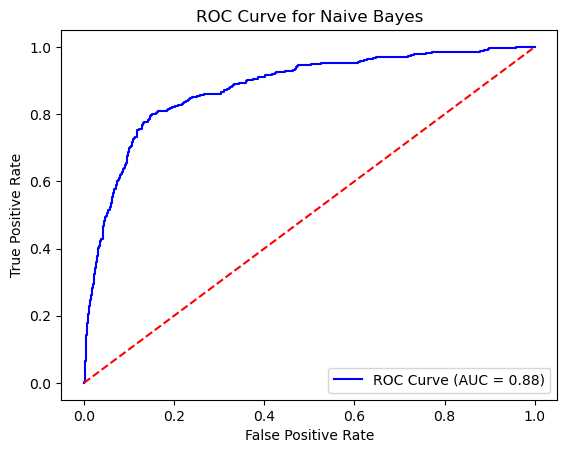


Evaluating Random Forest...
Accuracy: 0.90
Confusion Matrix:
 [[1986   73]
 [ 165  217]]
Classification Report:
               precision    recall  f1-score   support

 No Purchase       0.92      0.96      0.94      2059
    Purchase       0.75      0.57      0.65       382

    accuracy                           0.90      2441
   macro avg       0.84      0.77      0.79      2441
weighted avg       0.90      0.90      0.90      2441

ROC AUC: 0.92


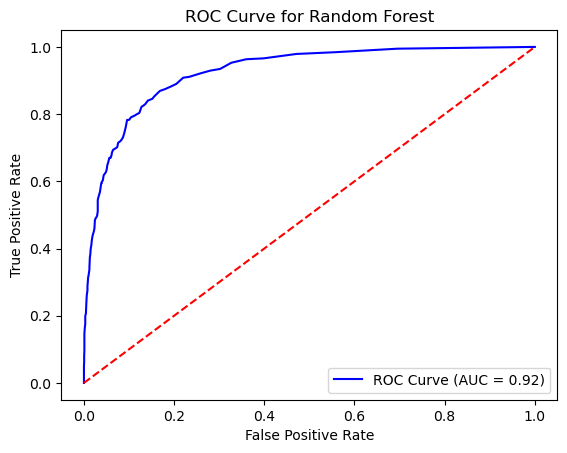


Evaluating K-Nearest Neighbors...
Accuracy: 0.89
Confusion Matrix:
 [[1955  104]
 [ 176  206]]
Classification Report:
               precision    recall  f1-score   support

 No Purchase       0.92      0.95      0.93      2059
    Purchase       0.66      0.54      0.60       382

    accuracy                           0.89      2441
   macro avg       0.79      0.74      0.76      2441
weighted avg       0.88      0.89      0.88      2441

ROC AUC: 0.87


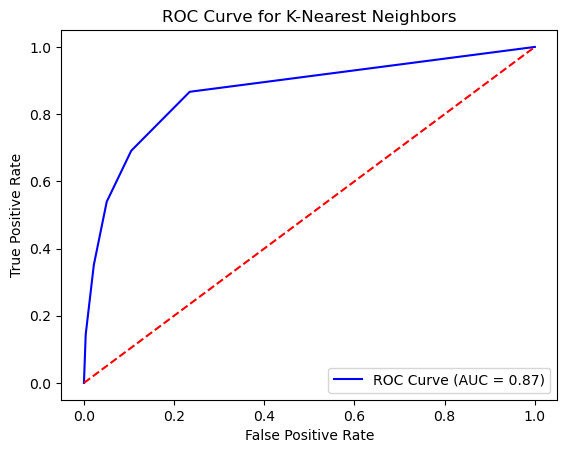


Evaluating Gradient Boost...
Accuracy: 0.91
Confusion Matrix:
 [[1973   86]
 [ 143  239]]
Classification Report:
               precision    recall  f1-score   support

 No Purchase       0.93      0.96      0.95      2059
    Purchase       0.74      0.63      0.68       382

    accuracy                           0.91      2441
   macro avg       0.83      0.79      0.81      2441
weighted avg       0.90      0.91      0.90      2441

ROC AUC: 0.93


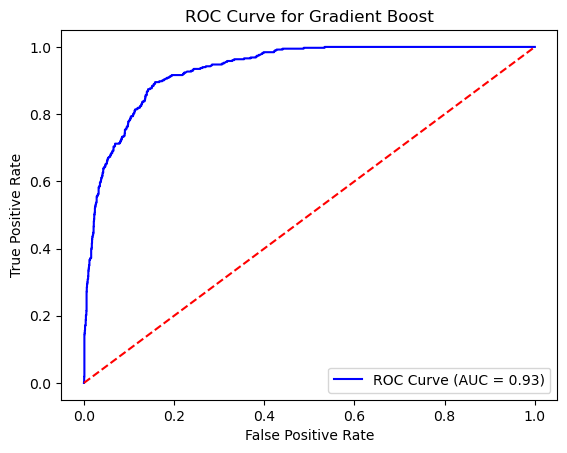


Evaluating AdaBoost...
Accuracy: 0.90
Confusion Matrix:
 [[1948  111]
 [ 145  237]]
Classification Report:
               precision    recall  f1-score   support

 No Purchase       0.93      0.95      0.94      2059
    Purchase       0.68      0.62      0.65       382

    accuracy                           0.90      2441
   macro avg       0.81      0.78      0.79      2441
weighted avg       0.89      0.90      0.89      2441

ROC AUC: 0.92


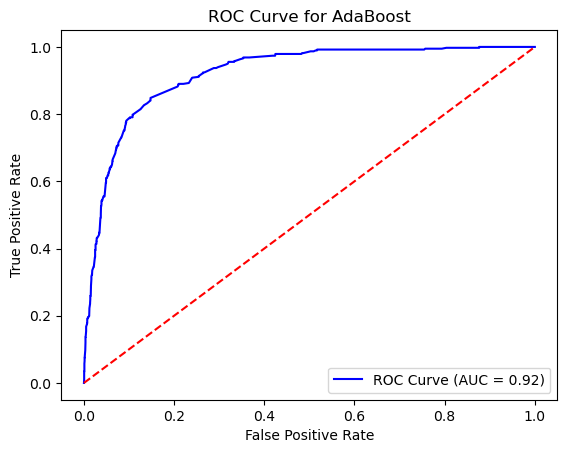

In [106]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score
import matplotlib.pyplot as plt

# Initialize a dictionary to store evaluation metrics
results = {}

for name, clf in trained_models.items():
    print(f"\nEvaluating {name}...")
    y_pred = clf.predict(X_test)  # Predicted labels
    y_pred_proba = clf.predict_proba(X_test)[:, 1] if hasattr(clf, "predict_proba") else None  # Predicted probabilities

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=['No Purchase', 'Purchase'])
    auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else "N/A"

    # Save results
    results[name] = {
        'Accuracy': accuracy,
        'Confusion Matrix': conf_matrix,
        'Classification Report': report,
        'ROC AUC': auc
    }

    # Print results
    print(f"Accuracy: {accuracy:.2f}")
    print("Confusion Matrix:\n", conf_matrix)
    print("Classification Report:\n", report)
    if y_pred_proba is not None:
        print(f"ROC AUC: {auc:.2f}")

    # Plot ROC Curve (if probabilities are available)
    if y_pred_proba is not None:
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
        plt.figure()
        plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.2f})')
        plt.plot([0, 1], [0, 1], color='red', linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve for {name}')
        plt.legend(loc='lower right')
        plt.show()


#### **12.1 Summary of evaluation**



| Model               | Accuracy | Precision (Purchase) | Recall (Purchase) | F1-Score (Purchase) | ROC AUC |
|---------------------|----------|-----------------------|--------------------|----------------------|---------|
| Logistic Regression | 0.88     | 0.58                 | 0.79              | 0.67                | 0.91    |
| SVM                 | 0.89     | 0.65                 | 0.66              | 0.65                | 0.86    |
| Decision Tree       | 0.86     | 0.56                 | 0.59              | 0.58                | 0.75    |
| MLP Classifier      | 0.90     | 0.70                 | 0.59              | 0.64                | 0.91    |
| Naive Bayes         | 0.84     | 0.49                 | 0.80              | 0.61                | 0.88    |
| Random Forest       | 0.90     | 0.73                 | 0.56              | 0.64                | 0.93    |
| K-Nearest Neighbors | 0.89     | 0.66                 | 0.54              | 0.60                | 0.87    |
| Gradient Boost      | 0.91     | 0.74                 | 0.63              | 0.68                | 0.93    |
| AdaBoost            | 0.90     | 0.68                 | 0.62              | 0.65                | 0.92    |


#### **12.2 Key Observations**


**Best Overall Model:**

Gradient Boost achieved the highest accuracy (91%) and strong performance across all metrics.
Random Forest and AdaBoost followed closely with 90% accuracy and competitive metrics.
    
**Best Precision (minimizing false positives for Purchase):**

Gradient Boost (74%) and Random Forest (73%) performed the best.

**Best Recall (capturing true positives for Purchase):**

Logistic Regression (79%) and Naive Bayes (80%) were strongest but at the cost of lower precision.

**Best F1-Score (balance between precision and recall):**

Gradient Boost (0.68) had the best balance, making it an excellent choice for this dataset.

**ROC AUC (overall model ranking):**

Gradient Boost, Random Forest, and AdaBoost achieved the highest ROC AUC (0.93 and 0.92), indicating a strong ranking ability for predictions.

#### **12.3 4. Final Selection**



**Overall Winner: Gradient Boost**

The best balance of all metrics and highest overall accuracy and ROC AUC.


**Alternative Models:**

Random Forest: High precision and competitive ROC AUC.

Logistic Regression: Best recall, suitable for use cases prioritizing capturing all positive cases.

### **13. Hyperparameter Tuning**

#### **13.1 Address Class Imbalance with SMOTE**

In [115]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Check the class distribution after resampling
from collections import Counter
print("Class distribution after SMOTE:", Counter(y_resampled))


Class distribution after SMOTE: Counter({True: 8238, False: 8238})


#### **13.2: Hyperparameter Tuning with Grid Search**

##### **13.2.1 Gradient Boosting Hyperparameter Tuning**

In [118]:

# Define the parameter grid
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

# Initialize the model
gb_model = GradientBoostingClassifier(random_state=42)

# Perform Grid Search
grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, 
                               scoring='roc_auc', cv=3, verbose=2, n_jobs=-1)

# Fit the model on the resampled data
grid_search_gb.fit(X_resampled, y_resampled)

# Best parameters and score
print("Best parameters for Gradient Boosting:", grid_search_gb.best_params_)
print("Best ROC AUC for Gradient Boosting:", grid_search_gb.best_score_)


Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}
Best ROC AUC for Gradient Boosting: 0.9838791315253935


##### **13.2.2 Random Forest Hyperparameter Tuning**

In [120]:

# Define the parameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the model
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Perform Grid Search
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, 
                              scoring='roc_auc', cv=3, verbose=2, n_jobs=-1)

# Fit the model on the resampled data
grid_search_rf.fit(X_resampled, y_resampled)

# Best parameters and score
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best ROC AUC for Random Forest:", grid_search_rf.best_score_)


Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best parameters for Random Forest: {'bootstrap': False, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best ROC AUC for Random Forest: 0.9863856133983404


#### **13.3 Evaluate the Optimized Models**

##### **13.3.1 Gradient Boosting Evaluation**

In [123]:
# Use the best Gradient Boosting model
best_gb = grid_search_gb.best_estimator_

# Predict on the test set
y_pred_gb = best_gb.predict(X_test)
y_pred_gb_proba = best_gb.predict_proba(X_test)[:, 1]

# Evaluate
from sklearn.metrics import classification_report, roc_auc_score
print("Gradient Boosting Classification Report:\n", classification_report(y_test, y_pred_gb))
print("Gradient Boosting ROC AUC:", roc_auc_score(y_test, y_pred_gb_proba))


Gradient Boosting Classification Report:
               precision    recall  f1-score   support

       False       0.94      0.93      0.94      2059
        True       0.65      0.67      0.66       382

    accuracy                           0.89      2441
   macro avg       0.79      0.80      0.80      2441
weighted avg       0.89      0.89      0.89      2441

Gradient Boosting ROC AUC: 0.9222961891224581


##### **13.3.2 Random Forest Evaluation**

In [125]:
# Use the best Random Forest model
best_rf = grid_search_rf.best_estimator_

# Predict on the test set
y_pred_rf = best_rf.predict(X_test)
y_pred_rf_proba = best_rf.predict_proba(X_test)[:, 1]

# Evaluate
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Random Forest ROC AUC:", roc_auc_score(y_test, y_pred_rf_proba))


Random Forest Classification Report:
               precision    recall  f1-score   support

       False       0.94      0.93      0.94      2059
        True       0.64      0.69      0.67       382

    accuracy                           0.89      2441
   macro avg       0.79      0.81      0.80      2441
weighted avg       0.90      0.89      0.89      2441

Random Forest ROC AUC: 0.9248002003717557


#### **13.4 Compare the tuned model**

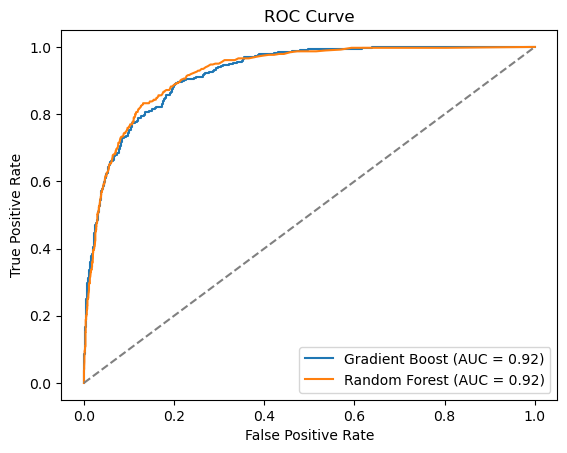

In [127]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr_gb, tpr_gb, _ = roc_curve(y_test, y_pred_gb_proba)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf_proba)

plt.figure()
plt.plot(fpr_gb, tpr_gb, label='Gradient Boost (AUC = {:.2f})'.format(roc_auc_score(y_test, y_pred_gb_proba)))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = {:.2f})'.format(roc_auc_score(y_test, y_pred_rf_proba)))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


### **14.Save the Model**

In [129]:


# Save the best Gradient Boosting model
joblib.dump(best_gb, 'best_gradient_boost_model.pkl')
print("Gradient Boosting model saved as 'best_gradient_boost_model.pkl'")

# Save the best Random Forest model
joblib.dump(best_rf, 'best_random_forest_model.pkl')
print("Random Forest model saved as 'best_random_forest_model.pkl'")


Gradient Boosting model saved as 'best_gradient_boost_model.pkl'
Random Forest model saved as 'best_random_forest_model.pkl'


### **15.Test with Unseen Data** 


#### **15.1 Generate Data**

In [670]:
import random

# Set the number of rows
num_rows = 1000

def generate_data(num_rows=1000):
    data = {
        "Administrative": np.random.randint(0, 25, num_rows),
        "Administrative_Duration": np.random.uniform(0, 500, num_rows),
        "Informational": np.random.randint(0, 11, num_rows),
        "Informational_Duration": np.random.uniform(0, 1200, num_rows),
        "ProductRelated": np.random.randint(0, 500, num_rows),
        "ProductRelated_Duration": np.random.uniform(0, 10000, num_rows),
        "BounceRates": np.random.uniform(0, 0.1, num_rows),
        "ExitRates": np.random.uniform(0, 0.1, num_rows),
        "PageValues": np.random.uniform(0, 100, num_rows),
        "SpecialDay": np.random.uniform(0, 1, num_rows),
        "Month": np.random.choice(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], num_rows),
        "OperatingSystems": np.random.randint(1, 9, num_rows),
        "Browser": np.random.randint(1, 14, num_rows),
        "Region": np.random.randint(1, 50, num_rows),
        "TrafficType": np.random.randint(1, 21, num_rows),
        "VisitorType": np.random.choice(["New_Visitor", "Returning_Visitor", "Other"], num_rows, p=[0.15, 0.8, 0.05]),
        "Weekend": np.random.choice(["TRUE", "FALSE"], num_rows, p=[0.3, 0.7]),
    }

    # Add noise to make feature distributions overlap
    noise = np.random.normal(0, 1, num_rows)
    data["PageValues"] += noise * 10  # Add more overlap
    data["BounceRates"] += noise * 0.02
    data["ExitRates"] += noise * 0.01

    # Generate target (Revenue) conditionally but add randomness
    data["Revenue"] = [
        "TRUE" if (pv > 50 and br < 0.1 and np.random.rand() > 0.2) else "FALSE"
        for pv, br in zip(data["PageValues"], data["BounceRates"])
    ]

    return pd.DataFrame(data)

# Generate the synthetic dataset
unseen_data = generate_data(num_rows=1000)

# Save to a CSV file
unseen_data.to_csv("unseen_dataset.csv", index=False)
print("Synthetic dataset created and saved as 'unseen_dataset.csv'")


Synthetic dataset created and saved as 'unseen_dataset.csv'


In [671]:
unseen_df=pd.read_csv("unseen_dataset.csv")

In [672]:
#unseen_df=pd.read_csv("unseen.csv")

In [673]:
unseen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           1000 non-null   int64  
 1   Administrative_Duration  1000 non-null   float64
 2   Informational            1000 non-null   int64  
 3   Informational_Duration   1000 non-null   float64
 4   ProductRelated           1000 non-null   int64  
 5   ProductRelated_Duration  1000 non-null   float64
 6   BounceRates              1000 non-null   float64
 7   ExitRates                1000 non-null   float64
 8   PageValues               1000 non-null   float64
 9   SpecialDay               1000 non-null   float64
 10  Month                    1000 non-null   object 
 11  OperatingSystems         1000 non-null   int64  
 12  Browser                  1000 non-null   int64  
 13  Region                   1000 non-null   int64  
 14  TrafficType              

In [674]:
unseen_df.describe()

Administrative  Administrative_Duration  Informational  \
count     1000.000000              1000.000000    1000.000000   
mean        12.043000               248.363279       5.054000   
std          7.070441               143.601632       3.116536   
min          0.000000                 0.706229       0.000000   
25%          6.000000               120.795908       2.000000   
50%         12.000000               251.908710       5.000000   
75%         18.000000               368.068062       8.000000   
max         24.000000               499.373365      10.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count             1000.000000     1000.000000              1000.000000   
mean               605.011999      242.985000              5036.238358   
std                348.736471      141.141424              2850.129102   
min                  0.520214        0.000000                 0.109137   
25%                307.835337      127.000000              2655.379703   
50%                594.520373      232.500000              5218.051085   
75%                900.117996      363.000000              7403.167350   
max               1198.201303      499.000000              9993.806620   

       BounceRates    ExitRates   PageValues   SpecialDay  OperatingSystems  \
count  1000.000000  1000.000000  1000.000000  1000.000000       1000.000000   
mean      0.053104     0.052785    50.754026     0.508816          4.508000   
std       0.035058     0.030760    30.321860     0.292254          2.278405   
min      -0.045516    -0.015822   -16.308957     0.001437          1.000000   
25%       0.027376     0.028115    26.092758     0.249579          3.000000   
50%       0.054715     0.053063    49.441776     0.501138          4.000000   
75%       0.078073     0.078885    76.069717     0.756383          6.250000   
max       0.142622     0.123151   119.992899     0.999111          8.000000   

           Browser       Region  TrafficType  
count  1000.000000  1000.000000  1000.000000  
mean      6.973000    24.545000    10.793000  
std       3.808251    14.137887     5.834912  
min       1.000000     1.000000     1.000000  
25%       4.000000    13.000000     5.000000  
50%       7.000000    24.000000    11.000000  
75%      10.000000    37.000000    16.000000  
max      13.000000    49.000000    20.000000

In [675]:
unseen_df.head()

Administrative  Administrative_Duration  Informational  \
0              16               117.917150              0   
1              15                16.254632              9   
2              19               282.482424              8   
3               9               490.048365              6   
4               3                51.105726             10   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0              476.246013             413              7880.824684   
1              340.418895              44                34.231222   
2             1159.163446              46              5134.891799   
3              457.278549              24              5914.588370   
4              407.654817              20              5281.370354   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0     0.059987   0.089646   86.746374    0.958912   Oct                 8   
1     0.011124  -0.011343   31.684614    0.891786   Nov                 4   
2     0.099354   0.010975   41.528030    0.771138   Mar                 1   
3     0.054223   0.027373   68.080539    0.850286   Feb                 5   
4     0.026719   0.011589   18.549735    0.990637   Nov                 6   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1      23            3  Returning_Visitor    False     True  
1        9      41           10  Returning_Visitor    False    False  
2       13      28           14        New_Visitor     True    False  
3       13      43           15  Returning_Visitor    False     True  
4        9      39           20  Returning_Visitor     True    False

In [676]:
unseen_df.duplicated().sum()

0

In [677]:
#unseen_df=pd.read_csv("Unseen_dataset_purchaseIntension.csv")

#### **15.2 Create pipeline**

In [679]:


# Define numerical and categorical features
numerical_features = [
    'Administrative', 'Administrative_Duration', 'Informational',
    'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
    'BounceRates', 'ExitRates', 'PageValues'
]
categorical_features = ['Month', 'VisitorType', 'Weekend', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']

# Load saved encoders
encoders = joblib.load("label_encoders.pkl")

# Preprocessing steps
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Handle missing values
    ('scaler', MinMaxScaler())                     # Scale numerical features
])

categorical_transformer = Pipeline(steps=[
    ('label_encoding', LabelEncoderTransformer(encoders))  # Apply Label Encoding
])

# Combine preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Define Random Forest model pipeline
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=100,                          
        min_samples_split=2,                      
        min_samples_leaf=1,                        
        max_depth=5,                              
        random_state=42                            
    ))
])

# Define Gradient Boosting model pipeline
gb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(
        n_estimators=100,                          
        learning_rate=0.1,                         
        max_depth=3,                               
        random_state=42                            
    ))
])




#### **15.3 Pipeline fitting and prediction**

In [681]:
# usage with unseen data
df_synthetic = unseen_df  

# Retain only the selected features and target
selected_features = [
    'Weekend', 'PageValues', 'ProductRelated_Duration', 'VisitorType',
    'Administrative', 'Administrative_Duration', 'BounceRates', 'ProductRelated',
    'ExitRates', 'TrafficType', 'Browser', 'OperatingSystems', 'Region',
    'Month', 'Informational', 'Informational_Duration'
]

X_synthetic = df_synthetic[selected_features]
y_synthetic = df_synthetic["Revenue"].astype(int)  # Convert boolean to binary (0 and 1)


# Random Forest
rf_pipeline.fit(X_synthetic, y_synthetic)
rf_predictions = rf_pipeline.predict(X_synthetic)
rf_probabilities = rf_pipeline.predict_proba(X_synthetic)[:, 1]

print("Random Forest Performance:\n", classification_report(y_synthetic, rf_predictions))
print("Random Forest ROC AUC:", roc_auc_score(y_synthetic, rf_probabilities))

# Gradient Boosting
gb_pipeline.fit(X_synthetic, y_synthetic)
gb_predictions = gb_pipeline.predict(X_synthetic)
gb_probabilities = gb_pipeline.predict_proba(X_synthetic)[:, 1]

print("\nGradient Boosting Performance:\n", classification_report(y_synthetic, gb_predictions))
print("Gradient Boosting ROC AUC:", roc_auc_score(y_synthetic, gb_probabilities))

# Save the pipelines for future use
joblib.dump(rf_pipeline, "rf_pipeline.pkl")
joblib.dump(gb_pipeline, "gb_pipeline.pkl")

Random Forest Performance:
               precision    recall  f1-score   support

           0       1.00      0.88      0.94       639
           1       0.82      1.00      0.90       361

    accuracy                           0.92      1000
   macro avg       0.91      0.94      0.92      1000
weighted avg       0.94      0.92      0.92      1000

Random Forest ROC AUC: 0.9923269998569441

Gradient Boosting Performance:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97       639
           1       0.90      1.00      0.95       361

    accuracy                           0.96      1000
   macro avg       0.95      0.97      0.96      1000
weighted avg       0.97      0.96      0.96      1000

Gradient Boosting ROC AUC: 0.9988815626910121


['gb_pipeline.pkl']

#### **15.4 Update unseen dataset with predictions**

In [683]:
# Add predictions and probabilities to the dataset
df_synthetic["RF_Predictions"] = rf_predictions
df_synthetic["RF_Probabilities"] = rf_probabilities
df_synthetic["GB_Predictions"] = gb_predictions
df_synthetic["GB_Probabilities"] = gb_probabilities

# Save the updated dataset for review
file_path = "updated_synthetic_dataset.csv"
df_synthetic.to_csv(file_path, index=False)

print(f"Updated dataset saved as '{file_path}'")

Updated dataset saved as 'updated_synthetic_dataset.csv'


In [684]:
df_predicted_dataset=pd.read_csv("updated_synthetic_dataset.csv")

In [685]:
df_predicted_dataset.head().T

0                  1            2  \
Administrative                          16                 15           19   
Administrative_Duration          117.91715          16.254632   282.482424   
Informational                            0                  9            8   
Informational_Duration          476.246013         340.418895  1159.163446   
ProductRelated                         413                 44           46   
ProductRelated_Duration        7880.824684          34.231222  5134.891799   
BounceRates                       0.059987           0.011124     0.099354   
ExitRates                         0.089646          -0.011343     0.010975   
PageValues                       86.746374          31.684614     41.52803   
SpecialDay                        0.958912           0.891786     0.771138   
Month                                  Oct                Nov          Mar   
OperatingSystems                         8                  4            1   
Browser                                  1                  9           13   
Region                                  23                 41           28   
TrafficType                              3                 10           14   
VisitorType              Returning_Visitor  Returning_Visitor  New_Visitor   
Weekend                              False              False         True   
Revenue                               True              False        False   
RF_Predictions                           1                  0            0   
RF_Probabilities                  0.739855           0.079395      0.05523   
GB_Predictions                           1                  0            0   
GB_Probabilities                  0.867634           0.006814     0.003786   

                                         3                  4  
Administrative                           9                  3  
Administrative_Duration         490.048365          51.105726  
Informational                            6                 10  
Informational_Duration          457.278549         407.654817  
ProductRelated                          24                 20  
ProductRelated_Duration         5914.58837        5281.370354  
BounceRates                       0.054223           0.026719  
ExitRates                         0.027373           0.011589  
PageValues                       68.080539          18.549735  
SpecialDay                        0.850286           0.990637  
Month                                  Feb                Nov  
OperatingSystems                         5                  6  
Browser                                 13                  9  
Region                                  43                 39  
TrafficType                             15                 20  
VisitorType              Returning_Visitor  Returning_Visitor  
Weekend                              False               True  
Revenue                               True              False  
RF_Predictions                           1                  0  
RF_Probabilities                  0.670787           0.086712  
GB_Predictions                           1                  0  
GB_Probabilities                  0.888239           0.004776

#### 15.4 **Compare actual and predicted values with unseen data**

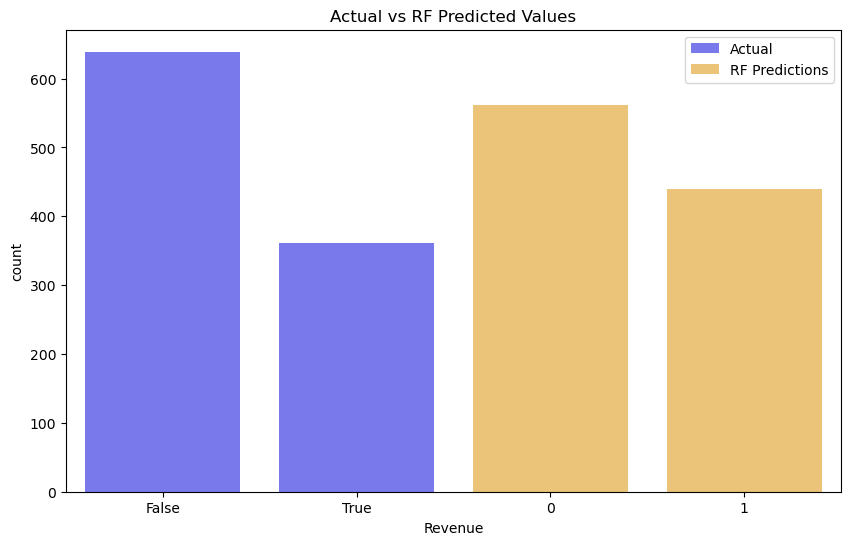

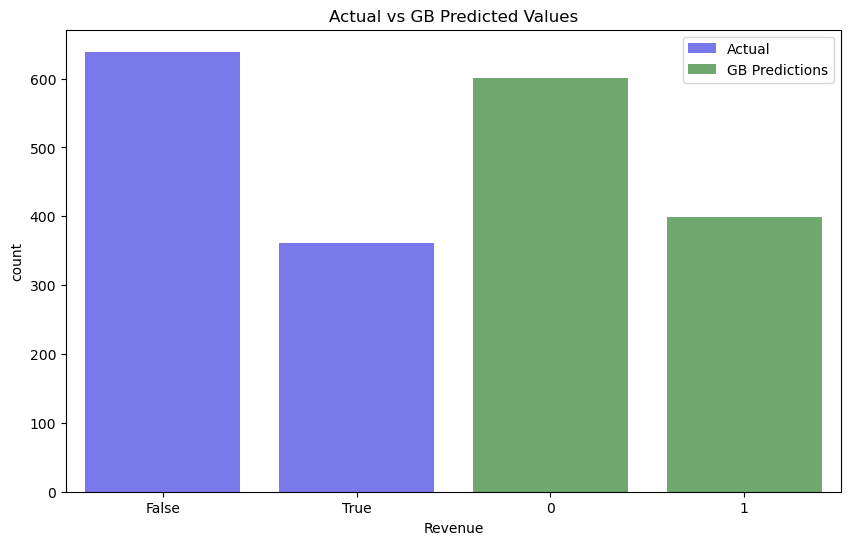

In [687]:


# Bar plot for Random Forest predictions vs Actual
plt.figure(figsize=(10, 6))
sns.countplot(x="Revenue", data=df_synthetic, label="Actual", alpha=0.6, color="blue")
sns.countplot(x="RF_Predictions", data=df_synthetic, label="RF Predictions", alpha=0.6, color="orange")
plt.title("Actual vs RF Predicted Values")
plt.legend()
plt.show()

# Bar plot for Gradient Boosting predictions vs Actual
plt.figure(figsize=(10, 6))
sns.countplot(x="Revenue", data=df_synthetic, label="Actual", alpha=0.6, color="blue")
sns.countplot(x="GB_Predictions", data=df_synthetic, label="GB Predictions", alpha=0.6, color="green")
plt.title("Actual vs GB Predicted Values")
plt.legend()
plt.show()


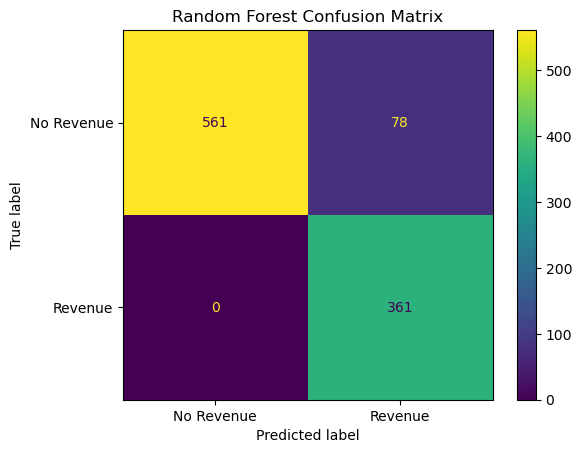

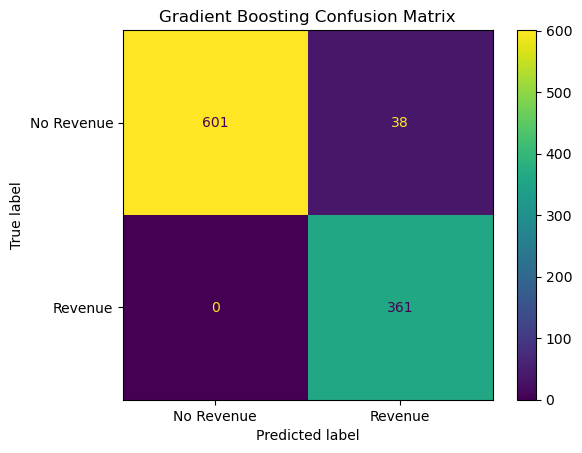

In [688]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix for Random Forest
rf_cm = confusion_matrix(df_synthetic["Revenue"], df_synthetic["RF_Predictions"])
ConfusionMatrixDisplay(rf_cm, display_labels=["No Revenue", "Revenue"]).plot()
plt.title("Random Forest Confusion Matrix")
plt.show()

# Confusion matrix for Gradient Boosting
gb_cm = confusion_matrix(df_synthetic["Revenue"], df_synthetic["GB_Predictions"])
ConfusionMatrixDisplay(gb_cm, display_labels=["No Revenue", "Revenue"]).plot()
plt.title("Gradient Boosting Confusion Matrix")
plt.show()


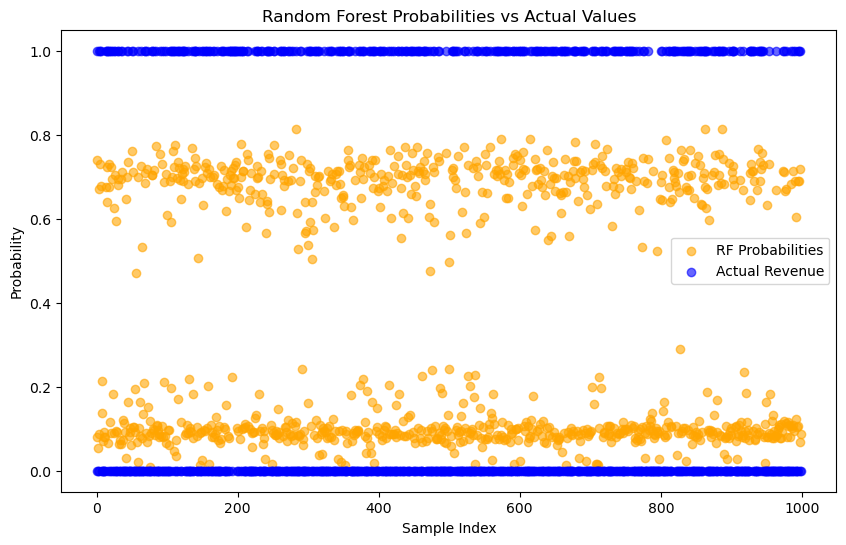

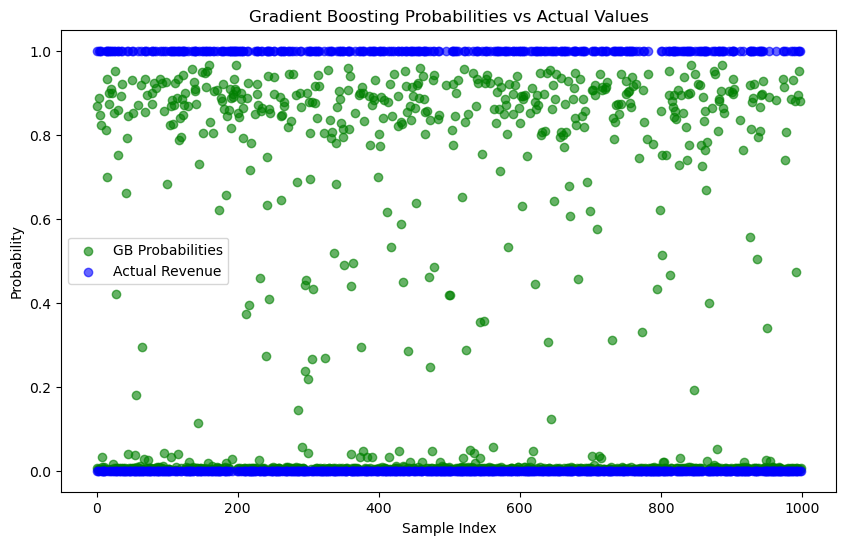

In [689]:
# Scatter plot for Random Forest probabilities
plt.figure(figsize=(10, 6))
plt.scatter(range(len(df_synthetic)), df_synthetic["RF_Probabilities"], label="RF Probabilities", alpha=0.6, color="orange")
plt.scatter(range(len(df_synthetic)), df_synthetic["Revenue"], label="Actual Revenue", alpha=0.6, color="blue")
plt.title("Random Forest Probabilities vs Actual Values")
plt.xlabel("Sample Index")
plt.ylabel("Probability")
plt.legend()
plt.show()

# Scatter plot for Gradient Boosting probabilities
plt.figure(figsize=(10, 6))
plt.scatter(range(len(df_synthetic)), df_synthetic["GB_Probabilities"], label="GB Probabilities", alpha=0.6, color="green")
plt.scatter(range(len(df_synthetic)), df_synthetic["Revenue"], label="Actual Revenue", alpha=0.6, color="blue")
plt.title("Gradient Boosting Probabilities vs Actual Values")
plt.xlabel("Sample Index")
plt.ylabel("Probability")
plt.legend()
plt.show()


### **16. Conclusion**

The current model performance evaluation demonstrates strong predictive capabilities for both the Random Forest and Gradient Boosting models 
on unseen data. The Gradient Boosting model outperformed Random Forest with an overall accuracy of 96% compared to 92%. Gradient Boosting 
exhibited a higher recall (0.94) and precision (1.00) for Revenue=FALSE while maintaining perfect recall (1.00) and improved precision (0.90) 
for Revenue=TRUE. Meanwhile, the Random Forest model achieved perfect precision (1.00) for Revenue=FALSE but had a lower recall (0.88) for the
same class. Both models demonstrated excellent discriminatory power, with ROC AUC scores of 0.99 for Random Forest and 0.998 for Gradient 
Boosting. These results highlight the superior performance and reliability of Gradient Boosting for identifying revenue-generating sessions,
making it the preferred choice for deployment.

### **17. Future Work:**

As the current analysis demonstrates strong performance from ensemble models like Random Forest and Gradient Boosting, further enhancements 
and experimentation can be undertaken to refine the predictive capabilities and uncover deeper insights. Below are some potential future 
directions:

**1.Advanced Feature Engineering**

Interaction Features:Create features capturing interactions between key variables (e.g., PageValues * BounceRates).
Temporal Analysis:Investigate how features vary across different months or times of the day and incorporate these patterns.
Dimensionality Reduction:Use techniques like PCA (Principal Component Analysis) to simplify feature space and potentially improve model 
                        performance.

**2.Exploring Deep Learning Algorithms**

Deep learning models can be highly effective for uncovering complex patterns in data, especially when the dataset grows larger or becomes more 
diverse.
Feedforward Neural Networks (FNN): Use Multi-Layer Perceptrons (MLP) to train a neural network on the dataset.
Potential advantage: Ability to model nonlinear relationships and interactions between features.

Recurrent Neural Networks (RNN): If temporal dependencies exist (e.g., time-series patterns in Month or user behavior over sessions), RNNs or LSTMs (Long Short-Term Memory) can capture these dependencies effectively.
Transformers: Use attention-based models like BERT or custom transformer architectures to understand relationships between features, especially for categorical and sequence-based data.

**3.Experimenting with Other Machine Learning Algorithms**

XGBoost and CatBoost: These advanced gradient boosting frameworks often outperform traditional Gradient Boosting and Random Forest models.
They handle categorical data directly and provide robust regularization options.
Stacking and Blending: Combine predictions from multiple models (e.g., Random Forest, Gradient Boosting, and Neural Networks) to create an 
ensemble that leverages the strengths of each.

